In [1]:

import kagglehub
mishra5001_credit_card_path = kagglehub.dataset_download('mishra5001/credit-card')

print('Data source import complete.')


100%|██████████| 112M/112M [00:04<00:00, 24.3MB/s]

Extracting files...


Data source import complete.


In [2]:
print(mishra5001_credit_card_path)

/root/.cache/kagglehub/datasets/mishra5001/credit-card/versions/1


# Credit Card Fraud Detection

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## Loading data

In [4]:
df_app = pd.read_csv('/root/.cache/kagglehub/datasets/mishra5001/credit-card/versions/1/application_data.csv')
pd.options.display.max_columns = None
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_app.shape

(307511, 122)

In [6]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Cleaning Data

In [8]:
# Calculating null values percentage
df_null = df_app.isnull().sum()
pd.options.display.max_rows = None
df_app_percentage = (df_null/len(df_app))*100
df_app_percentage.sort_values(ascending=False)

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


In [9]:
len(df_app_percentage[df_app_percentage.values>0])

67

we have 67 columns have null values and because of Occupation Type plays a significant role to find whether the person will default or not i decided to drop column have more than 32% null values

In [10]:
df_app_rm = df_null/len(df_app)
df_app_clean = df_app.loc[:,df_app_rm <= .32]

**Checking the dropped columns**

In [11]:
df_app_removed=df_app.loc[:,df_app_rm > .32]
df_app_removed.columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

**Shape of new data frame after removing null values >32%**

In [12]:
df_app_clean.shape

(307511, 73)

## Handling Errors in  Data

In [13]:
df_app_clean.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [14]:
df_app_clean[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df_app_clean[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].abs()
df_app_clean[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df_app_clean[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]//365.25
# changing name to years
df_app_clean.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [15]:
df_app_clean["CODE_GENDER"].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [16]:
df_app_clean.loc[df_app_clean["CODE_GENDER"] == "XNA",'CODE_GENDER'] = "F"

<Axes: xlabel='CODE_GENDER', ylabel='count'>

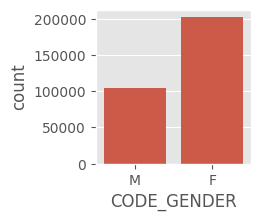

In [17]:
plt.figure(figsize=(2,2))
sns.countplot(data=df_app_clean , x='CODE_GENDER')

In [18]:
df_app_clean["ORGANIZATION_TYPE"].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


In [19]:
df_app_clean["ORGANIZATION_TYPE"].describe()

,ORGANIZATION_TYPE
count,307511
unique,58
top,Business Entity Type 3
freq,67992


In [20]:
df_app_clean[df_app_clean["ORGANIZATION_TYPE"] == "XNA"].NAME_INCOME_TYPE.value_counts()

,count
NAME_INCOME_TYPE,
Pensioner,55352
Unemployed,22


In [21]:
df_app_clean["ORGANIZATION_TYPE"].replace("XNA" ,"pensioner" ,inplace=True)

In [22]:
df_app_clean['FLAG_OWN_CAR'] = df_app_clean['FLAG_OWN_CAR'].map({'Y':1 , 'N': 0})


df_app_clean['FLAG_OWN_REALTY'] = df_app_clean['FLAG_OWN_REALTY'].map({'Y':1 , 'N': 0})


## Handling Missing Values

**Dealing with columns that have null values less than 32%**

In [23]:
df_app_clean.isnull().sum()[df_app_clean.isnull().sum() > 0].sort_values()

,0
DAYS_LAST_PHONE_CHANGE,1
CNT_FAM_MEMBERS,2
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
EXT_SOURCE_2,660
DEF_60_CNT_SOCIAL_CIRCLE,1021
OBS_60_CNT_SOCIAL_CIRCLE,1021
DEF_30_CNT_SOCIAL_CIRCLE,1021
OBS_30_CNT_SOCIAL_CIRCLE,1021
NAME_TYPE_SUITE,1292


In [24]:
df_app_clean["DAYS_LAST_PHONE_CHANGE"].describe()

,DAYS_LAST_PHONE_CHANGE
count,307510.000000
mean,2.222230
std,2.192073
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,11.000000


In [25]:
df_app_clean["DAYS_LAST_PHONE_CHANGE"].fillna(round(df_app_clean["DAYS_LAST_PHONE_CHANGE"].mean()),inplace=True)

In [26]:
df_app_clean["CNT_FAM_MEMBERS"].fillna(df_app_clean["CNT_FAM_MEMBERS"].mode(),inplace=True)

<Axes: xlabel='AMT_ANNUITY'>

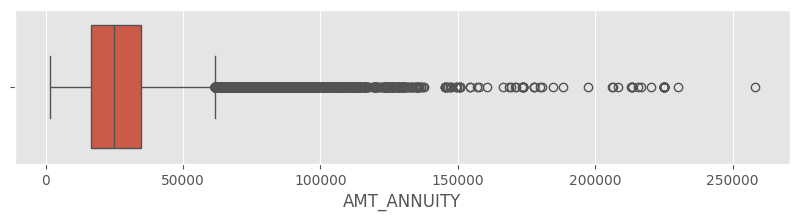

In [27]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df_app_clean,x=df_app_clean["AMT_ANNUITY"])

<Axes: xlabel='AMT_GOODS_PRICE'>

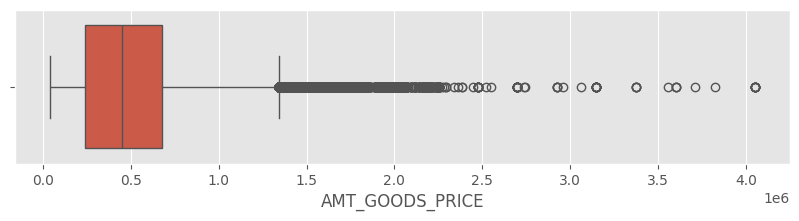

In [28]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df_app_clean,x=df_app_clean["AMT_GOODS_PRICE"])

In [29]:
print(df_app_clean["AMT_ANNUITY"].head(5))
print(df_app_clean["AMT_ANNUITY"].describe())
print("Median =" ,df_app_clean["AMT_ANNUITY"].median())
df_app_clean['AMT_CREDIT'].mean()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
Median = 24903.0


599025.9997057016

In [30]:
df_app_clean["AMT_ANNUITY"].fillna(df_app_clean["AMT_ANNUITY"].median(),inplace=True)

In [31]:
print(df_app_clean["AMT_GOODS_PRICE"].head(5))
pd.set_option('display.float_format', '{:.0f}'.format)
print(df_app_clean["AMT_GOODS_PRICE"].describe())
print(df_app_clean["AMT_GOODS_PRICE"].median())

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
count    307233
mean     538396
std      369446
min       40500
25%      238500
50%      450000
75%      679500
max     4050000
Name: AMT_GOODS_PRICE, dtype: float64
450000.0


In [32]:
df_app_clean["AMT_GOODS_PRICE"].fillna(df_app_clean["AMT_GOODS_PRICE"].median(),inplace=True)

In [33]:
df_app_clean[["OBS_30_CNT_SOCIAL_CIRCLE",
              "DEF_30_CNT_SOCIAL_CIRCLE",
              "OBS_60_CNT_SOCIAL_CIRCLE",
              "DEF_60_CNT_SOCIAL_CIRCLE"]].mode()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,0,0,0,0


In [34]:
df_app_clean[["OBS_30_CNT_SOCIAL_CIRCLE",
              "DEF_30_CNT_SOCIAL_CIRCLE",
              "OBS_60_CNT_SOCIAL_CIRCLE",
              "DEF_60_CNT_SOCIAL_CIRCLE"]].median()

,0
OBS_30_CNT_SOCIAL_CIRCLE,0
DEF_30_CNT_SOCIAL_CIRCLE,0
OBS_60_CNT_SOCIAL_CIRCLE,0
DEF_60_CNT_SOCIAL_CIRCLE,0


In [35]:
df_app_clean["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
df_app_clean["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
df_app_clean["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
df_app_clean["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [36]:
df_app_clean["NAME_TYPE_SUITE"].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,248526
Family,40149
"Spouse, partner",11370
Children,3267
Other_B,1770
Other_A,866
Group of people,271


In [37]:
df_app_clean["NAME_TYPE_SUITE"].fillna("Unaccompanied" , inplace=True)

In [38]:
df_app_clean.isnull().sum()[df_app_clean.isnull().sum() > 0].sort_values()

,0
CNT_FAM_MEMBERS,2
EXT_SOURCE_2,660
AMT_REQ_CREDIT_BUREAU_HOUR,41519
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519
AMT_REQ_CREDIT_BUREAU_YEAR,41519
EXT_SOURCE_3,60965
OCCUPATION_TYPE,96391


- `AMT_REQ_CREDIT_BUREAU_HOUR`
- `AMT_REQ_CREDIT_BUREAU_DAY`
- `AMT_REQ_CREDIT_BUREAU_WEEK`
- `AMT_REQ_CREDIT_BUREAU_MON`
- `AMT_REQ_CREDIT_BUREAU_QRT`
- `AMT_REQ_CREDIT_BUREAU_YEAR`

In [39]:
df_app_clean[["AMT_REQ_CREDIT_BUREAU_HOUR"
              ,"AMT_REQ_CREDIT_BUREAU_DAY"
              ,"AMT_REQ_CREDIT_BUREAU_WEEK"
              ,"AMT_REQ_CREDIT_BUREAU_MON"
             ,"AMT_REQ_CREDIT_BUREAU_QRT"
             ,"AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992,265992,265992,265992,265992,265992
mean,0,0,0,0,0,2
std,0,0,0,1,1,2
min,0,0,0,0,0,0
25%,0,0,0,0,0,0
50%,0,0,0,0,0,1
75%,0,0,0,0,0,3
max,4,9,8,27,261,25


In [40]:
df_app_clean[["AMT_REQ_CREDIT_BUREAU_HOUR"
              ,"AMT_REQ_CREDIT_BUREAU_DAY"
              ,"AMT_REQ_CREDIT_BUREAU_WEEK"
              ,"AMT_REQ_CREDIT_BUREAU_MON"
             ,"AMT_REQ_CREDIT_BUREAU_QRT"
             ,"AMT_REQ_CREDIT_BUREAU_YEAR"]].mode()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,0,0


In [41]:
df_app_clean[["AMT_REQ_CREDIT_BUREAU_HOUR"
              ,"AMT_REQ_CREDIT_BUREAU_DAY"
              ,"AMT_REQ_CREDIT_BUREAU_WEEK"
              ,"AMT_REQ_CREDIT_BUREAU_MON"
             ,"AMT_REQ_CREDIT_BUREAU_QRT"
             ,"AMT_REQ_CREDIT_BUREAU_YEAR"]].median()

,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_YEAR,1


In [42]:
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())
print(df_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

AMT_REQ_CREDIT_BUREAU_HOUR
0    264366
1      1560
2        56
3         9
4         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY
0    264503
1      1292
2       106
3        45
4        26
5         9
6         8
9         2
8         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK
0    257456
1      8208
2       199
3        58
4        34
6        20
5        10
8         5
7         2
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON
0     222233
1      33147
2       5386
3       1991
4       1076
5        602
6        343
7        298
9        206
8        185
10       132
11       119
12        77
13        72
14        40
15        35
16        23
17        14
18         6
19         3
24         1
23         1
27         1
22         1
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_QRT
0      215417
1       33862
2       14412
3        1717
4         476
5          64
6          28
8           7
7           7
261         1
19          1
Name: count, dtype: in

**as per the given discription these variables indicate number of days, hrs, months, etc. we can conclude that these are columns with categorical values**

**And regarding the null values, as it can be seen from the data above, since these are categorical columns, and there mode value is 0 for all these variables. so, it is safe to impute the null values with 0.**

In [43]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)
df_app_clean['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)
df_app_clean['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)
df_app_clean['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)
df_app_clean['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)
df_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)

- `OCCUPATION_TYPE`

In [44]:
df_app_clean["OCCUPATION_TYPE"].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721


In [45]:
df_app_clean["OCCUPATION_TYPE"].fillna("Missing" ,inplace=True)

In [46]:
df_app_clean.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500,406598,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,25,1,9,5,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,0,2,2,2,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,0,0,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0,45,3,3,0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,NaN,1,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,1,1,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,52,0,11,6,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,0,1,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,52,8,26,6,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1,NaN,2,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,0,1,0,121500,513000,21866,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,54,8,11,9,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,NaN,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,0,1,0,99000,490496,27518,454500,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0,46,4,13,1,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0,1,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,100009,0,Cash loans,F,1,1,1,171000,1560726,41301,1395000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0,37,8,3,1,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1,0,1,0,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2
7,100010,0,Cash loans,M,1,1,0,360000,1530000,42075,1530000,Unaccompanied,State servant,Higher education,Married,House / apartment,0,51,1,12,6,1,1,1,1,0,0,Managers,2,3,3,MONDAY,16,0,0,0,0,1,1,Other,1,1,2,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,0,1,0,112500,1019610,33826,913500,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0,55,999,20,9,1,0,0,1,0,0,Missing,2,2,2,WEDNESDAY,14,0,0,0,0,0,0,pensioner,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,100012,0,Revolving loans,M,0,1,0,135000,405000,20250,405000,Unaccompanied,Working,Secondary / secondary sp

## Identifying and handling outliers

In [47]:
def detect_outliers(data,col):
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data,x=col)
    q1 = np.percentile(data[col],25)
    q3 = np.percentile(data[col],75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    q99 = np.percentile(data[col],99)
    return lower_bound,upper_bound,q99

In [48]:
df_app_clean.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,306851,246546,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
mean,278181,0,0,1,0,168798,599026,27108,538316,0,43,185,13,8,1,1,0,1,0,0,2,2,2,12,0,0,0,0,0,0,1,1,1,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
std,102790,0,0,0,1,237123,402491,14493,369289,0,12,382,10,4,0,0,0,0,0,0,1,1,1,3,0,0,0,0,0,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
min,100002,0,0,0,0,25650,45000,1616,40500,0,20,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,189146,0,0,0,0,112500,270000,16524,238500,0,33,2,5,4,1,1,0,1,0,0,2,2,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,278202,0,0,1,0,147150,513531,24903,450000,0,43,6,12,8,1,1,0,1,0,0,2,2,2,12,0,0,0,0,0,0,1,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
75%,367142,0,1,1,1,202500,808650,34596,679500,0,53,15,20,11,1,1,0,1,1,0,3,2,2,14,0,0,0,0,0,0,1,1,2,0,2,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
max,456255,1,1,1,19,117000000,4050000,258026,4050000,0,69,999,67,19,1,1,1,1,1,1,20,3,3,23,1,1,1,1,1,1,1,1,348,34,344,24,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,8,27,261,25


- `CNT_CHILDREN `

3.0
Number of values above upper bound   555


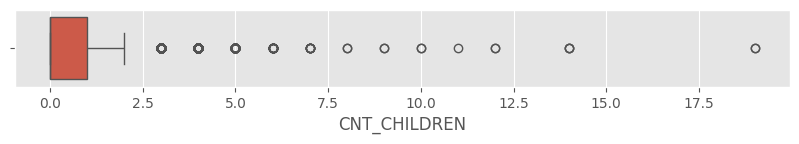

In [49]:
l,u,q =detect_outliers(df_app_clean,'CNT_CHILDREN')
print(q)
print("Number of values above upper bound  " , len(df_app_clean[df_app_clean["CNT_CHILDREN"]>q]))

In [50]:
df_app_clean["CNT_CHILDREN"].value_counts()

,count
CNT_CHILDREN,
0,215371
1,61119
2,26749
3,3717
4,429
5,84
6,21
7,7
14,3


- **`CNT_CHILDREN`** have outlier values having children more than 5.

- **`AMT_INCOME_TOTAL`**

337500.0


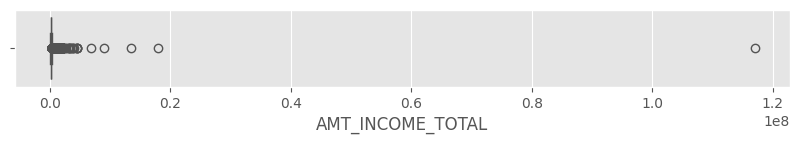

In [51]:
lower,up,q99 = detect_outliers(df_app_clean,"AMT_INCOME_TOTAL")
print(up)


In [52]:
df_app_clean['AMT_INCOME_TOTAL'].max()

117000000.0

In [53]:
print("Customers have income > upper_bound : " ,len(df_app_clean[df_app_clean.AMT_INCOME_TOTAL>up]))

Customers have income > upper_bound :  14035


<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

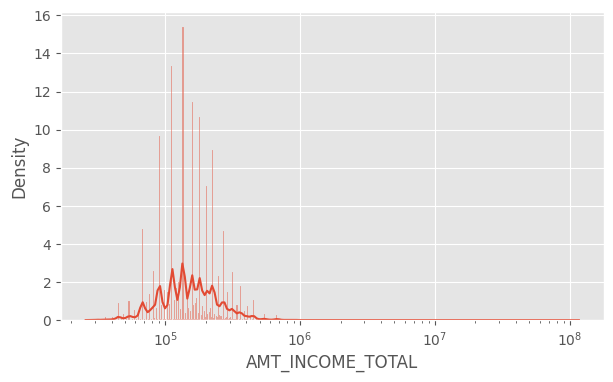

In [54]:
plt.figure(figsize=(7,4))
plt.xscale('log')
sns.histplot(data=df_app_clean , x='AMT_INCOME_TOTAL',stat="density",kde=True)

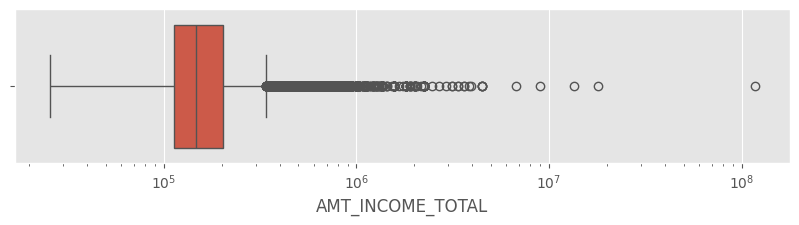

In [55]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df_app_clean  , x=df_app_clean["AMT_INCOME_TOTAL"])
plt.xscale('log')

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='NAME_INCOME_TYPE'>

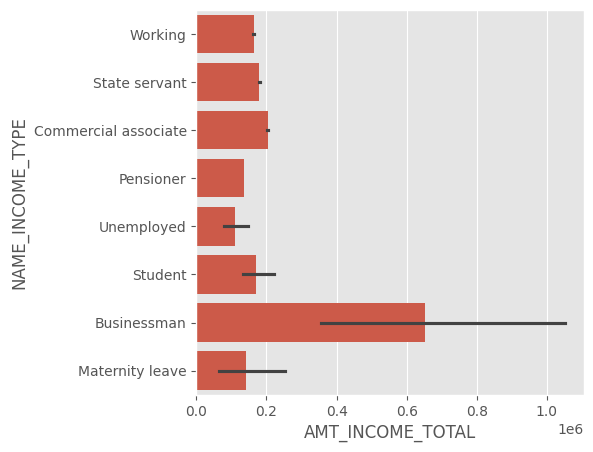

In [56]:
plt.figure(figsize=(5,5))
sns.barplot(data=df_app_clean , y="NAME_INCOME_TYPE" , x = "AMT_INCOME_TOTAL")

**`AMT_INCOME_TOTAL`** have large number of outliers but when take the log of the graph it's normally distributed which mean this isn't outliers and from plotting  **`NAME_INCOME_TYPE`** with **`AMT_INCOME_TOTAL`** we see that it is a category


.

- **`AMT_CREDIT`** ,  **`AMT_ANNUITY`** , **`AMT_GOODS_PRICE`**

In [57]:
num = ['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']

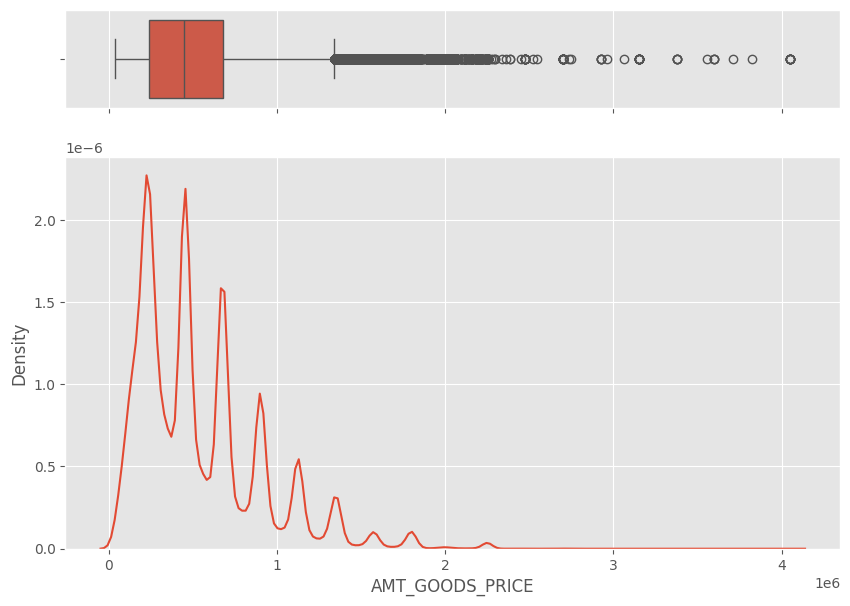

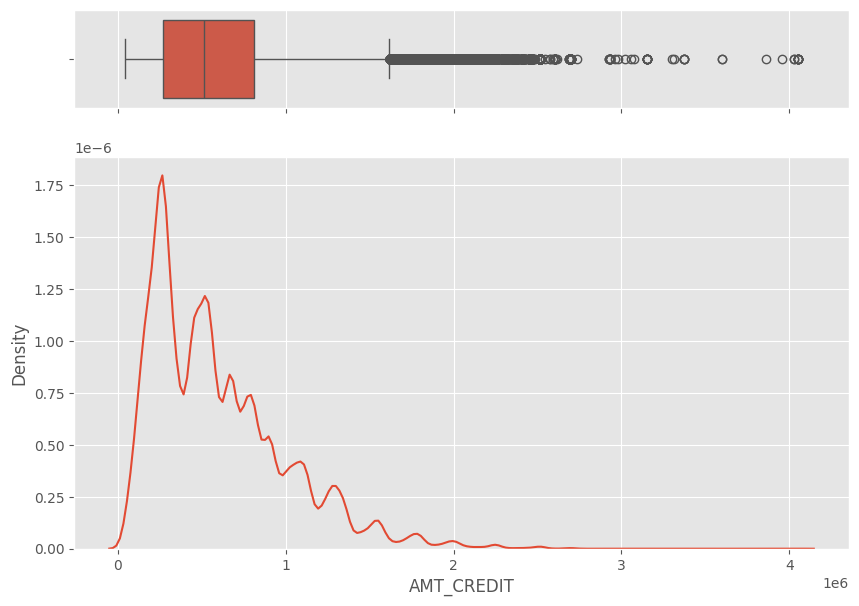

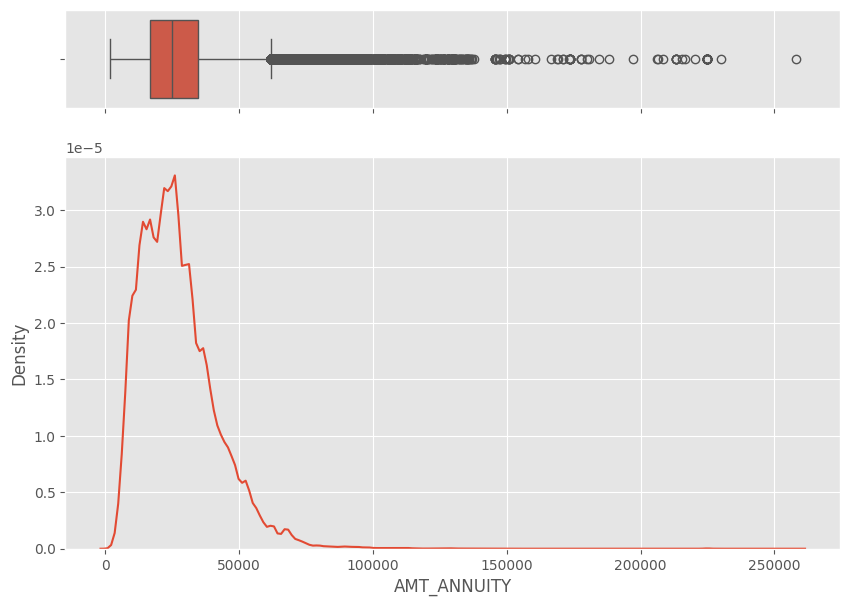

In [58]:
for i in num:
    f, (ax_box, ax_kde) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},
                                    figsize=(10, 7))
    sns.boxplot(data=df_app_clean  , x=df_app_clean[i] ,ax=ax_box)
    sns.kdeplot(data=df_app_clean,x=i,ax=ax_kde)
    plt.show()

- Third quartile of **`AMT_CREDIT`** is larger as compared to First quartile which means that most of the **Credit amount of the loan** of customers are present in the third quartile.And there are large number of outliers present in **`AMT_CREDIT`**
- Third quartile of **`AMT_GOODS_PRICE`** and **`AMT_ANNUITY`** is larger as compared to First quartile and both have a large number of outliers.

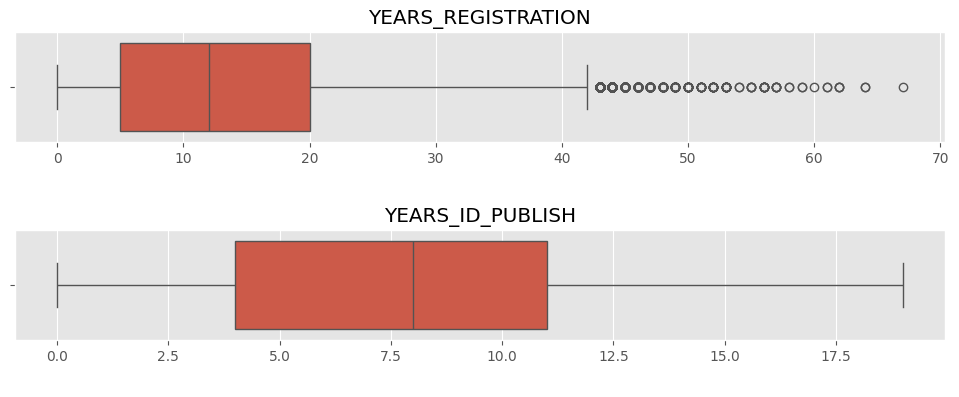

In [59]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
sns.boxplot(data=df_app_clean ,  x=df_app_clean['YEARS_REGISTRATION'])
plt.title("YEARS_REGISTRATION")
plt.xlabel(" ")
plt.subplot(2,1,2)
sns.boxplot(data=df_app_clean ,  x=df_app_clean["YEARS_ID_PUBLISH"])
plt.title("YEARS_ID_PUBLISH")
plt.xlabel(" ")
plt.subplots_adjust(hspace=0.8)

- **`AGE`**

In [60]:
df_app_clean["YEARS_BIRTH"].describe()

,YEARS_BIRTH
count,307511
mean,43
std,12
min,20
25%,33
50%,43
75%,53
max,69


In [61]:
df_app_clean['AgeGroup'] = pd.cut(df_app_clean['YEARS_BIRTH'],
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Old'])
df_app_clean["AgeGroup"].value_counts()

,count
AgeGroup,
Middle_Age,185971
Young,76007
Old,29124
Very_Young,16409


<Axes: xlabel='YEARS_BIRTH'>

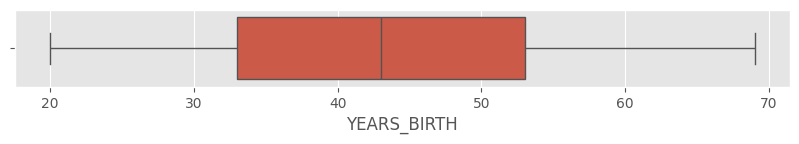

In [62]:
plt.figure(figsize=(10,1))
sns.boxplot(data=df_app_clean,x=df_app_clean["YEARS_BIRTH"])

<Axes: xlabel='AgeGroup', ylabel='count'>

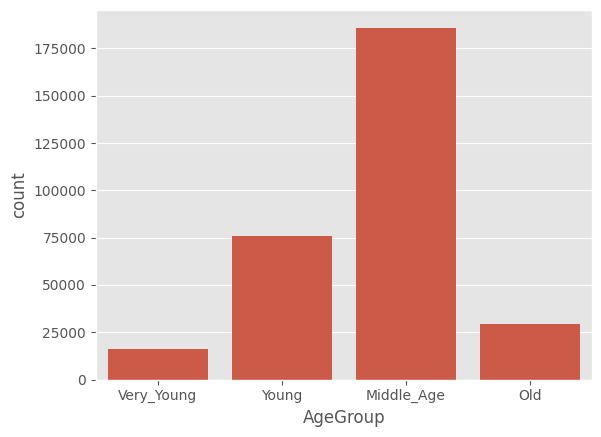

In [63]:
sns.countplot(data=df_app_clean,x="AgeGroup")

- **`YEARS_EMPLOYED`**

<Axes: xlabel='YEARS_EMPLOYED'>

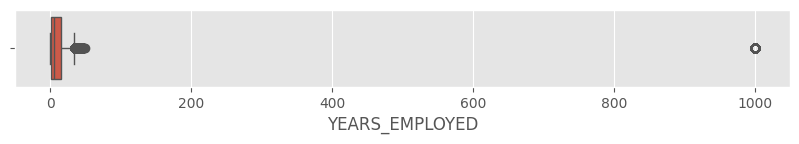

In [64]:
plt.figure(figsize=(10,1))
sns.boxplot(data=df_app_clean , x= df_app_clean["YEARS_EMPLOYED"])

In [65]:
df_app_clean["YEARS_EMPLOYED"].describe()

,YEARS_EMPLOYED
count,307511
mean,185
std,382
min,0
25%,2
50%,6
75%,15
max,999


In [66]:
df_app_clean["YEARS_EMPLOYED"].value_counts()

,count
YEARS_EMPLOYED,
999,55374
1,31845
2,29627
0,27982
3,25101
4,21801
5,16259
6,15030
7,13148


In [67]:
df_app_clean[df_app_clean["YEARS_EMPLOYED"] == 999].NAME_INCOME_TYPE.value_counts()

,count
NAME_INCOME_TYPE,
Pensioner,55352
Unemployed,22


In [68]:
df_app_clean[df_app_clean["YEARS_EMPLOYED"] == 999].OCCUPATION_TYPE.value_counts()

,count
OCCUPATION_TYPE,
Missing,55372
Cleaning staff,2


**so `pensioners` and `unemployed` have entered incorrect data of 1000 years of employment**

**so it's safeto impute this values with NAN/ null**


In [69]:
df_app_clean.loc[df_app_clean["YEARS_EMPLOYED"] == 999, 'YEARS_EMPLOYED']= np.NAN

<Axes: xlabel='YEARS_EMPLOYED'>

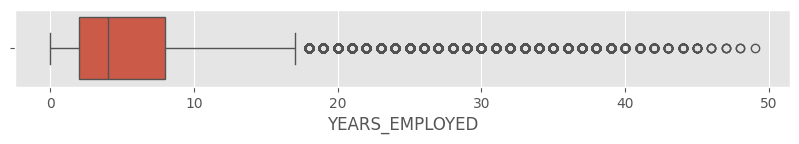

In [70]:
plt.figure(figsize=(10,1))
sns.boxplot(data=df_app_clean,x='YEARS_EMPLOYED')

In [71]:
df_app_clean.shape

(307511, 74)

## Checking Data Imbalance for Target Variable

<Axes: xlabel='TARGET', ylabel='count'>

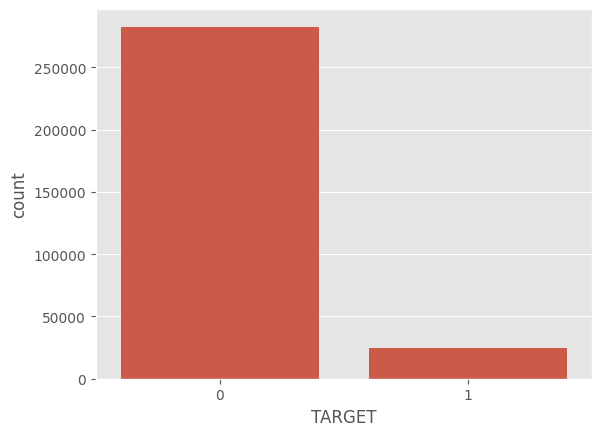

In [72]:
ratio = df_app_clean["TARGET"].value_counts()
sns.countplot(data=df_app_clean , x="TARGET")

In [73]:
print(ratio[0]/ratio[1])


11.387150050352467


*The Imbalance ratio is* ***`"1 : 11"`***

In [74]:
print("the percentage of non-defaulted :{} % ".format((ratio[0]/(df_app_clean["TARGET"].count()))*100))
print("the percentage of defaulted :{} % ".format((ratio[1]/(df_app_clean["TARGET"].count()))*100))

the percentage of non-defaulted :91.92711805431351 % 
the percentage of defaulted :8.072881945686495 % 


- Data is highly imbalanced. **`Defaulted population is 8.1 % and non- defaulted population is 91.9%`** .Ratio is **`11.3`**

**Splitting original dataframe into two dataframes based on TARGET values we will use them for better understanding**

In [75]:
df_0 = df_app_clean[df_app_clean["TARGET"] == 0 ]
df_1 =df_app_clean[df_app_clean["TARGET"] == 1]

## Analysis

**Creating Function to calculate the percntage of default for each subcategory  variable and plotting it with count of each category**

In [76]:
def plt_percentage(col , h =False):
    if (h == False):
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.countplot(data=df_app_clean , x=col)
        plt.title(col)
        plt.subplot(1,2,2)
        percentage_1_in_category = df_app_clean.groupby(col)['TARGET'].apply(lambda x: (x == 1).sum() / len(x) ).reset_index()
        sns.barplot(x=col, y='TARGET', data=percentage_1_in_category.sort_values(by="TARGET", ascending=False))
        plt.title('Percentage of default')
        plt.xlabel(col)
        plt.ylabel('Percentage')
    else:
        plt.figure(figsize=(13,10))
        plt.subplot(2,1,1)
        sns.countplot(data=df_app_clean , x=col)
        plt.title(col)
        plt.subplot(2,1,2)
        percentage_1_in_category = df_app_clean.groupby(col)['TARGET'].apply(lambda x: (x == 1).sum() / len(x) ).reset_index()
        sns.barplot(x=col, y='TARGET', data=percentage_1_in_category.sort_values(by="TARGET", ascending=False))
        plt.title('Percentage of  default')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.subplots_adjust(hspace=0.4)

### Checking FLAG_DOCUMENT2:21 and FLAG_MOBIL,FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE,FLAG_PHONE , FLAG_EMAIL**

- for **`FLAG_DOCUMENT_2 : 21`** which describe if the customer submit  this documents or not
- for **`FLAG_MOBIL,FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE,FLAG_PHONE , FLAG_EMAIL`** : which describe if the customer submit this phones/ email or not

- Trying to add this flags into two columns Documents_sub and phones_sub and see if they add any value for our analysis or not

In [77]:
df_app_clean["Documents_sub"] = df_app_clean.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum(axis=1)
df_app_clean["phones_sub"] = df_app_clean.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].sum(axis=1)

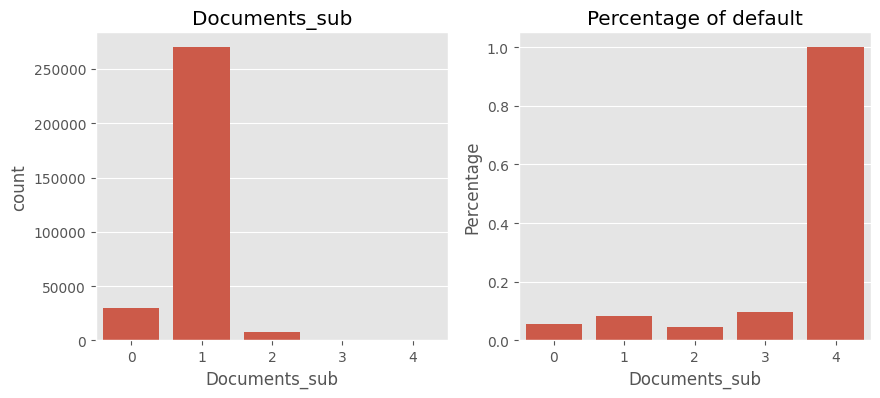

In [78]:
plt_percentage('Documents_sub')

- it seems like **Clients who submitted more documents are more risky**

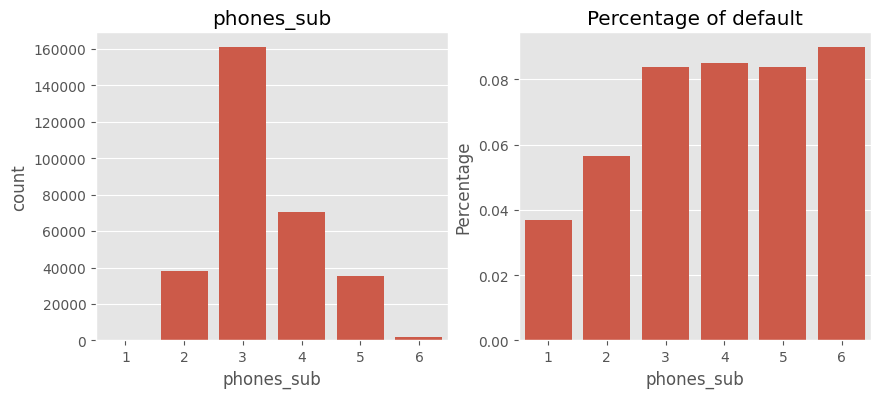

In [79]:
plt_percentage('phones_sub')

- clients who sumbitted more phones have **higher percentage of defalut**

*To simplify data  drop columns flag_document 2:22 and other flags  so that the data looks clear*

In [80]:
df_app_clean =df_app_clean.drop(columns=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
                                         "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9",
                                         "FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
                                         "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17",
                                         "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21",
                                         'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                         'FLAG_PHONE','FLAG_EMAIL'])

### Checking other categorical coulmns with Target

In [81]:
cols = ["LIVE_REGION_NOT_WORK_REGION",'AMT_REQ_CREDIT_BUREAU_HOUR',"REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON'
        ,'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
       'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_QRT']

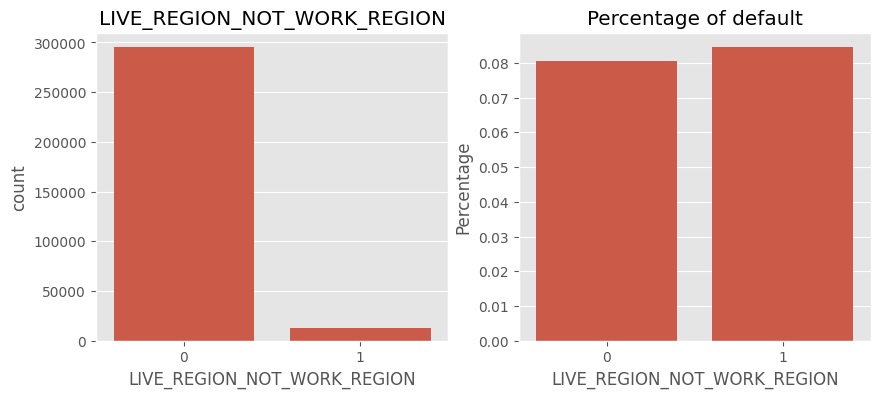

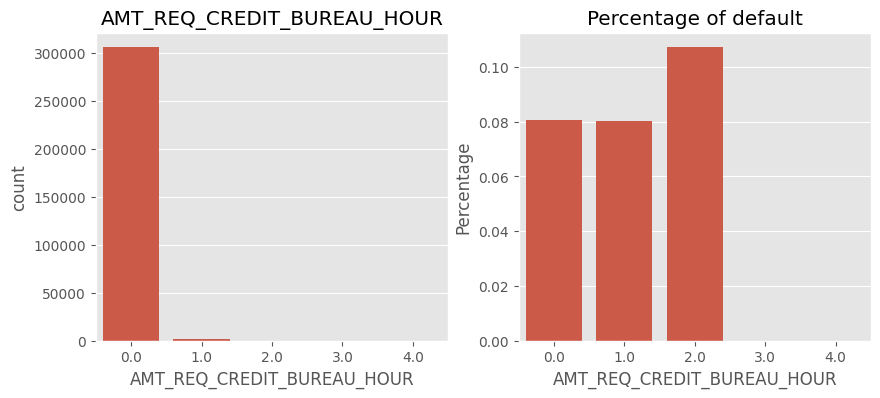

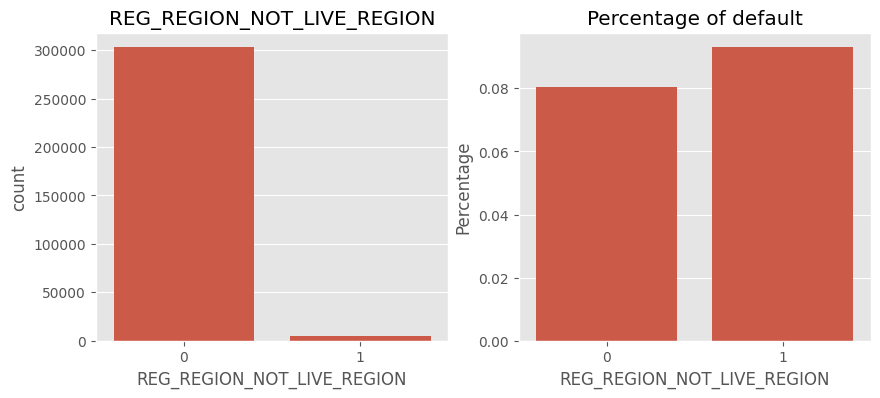

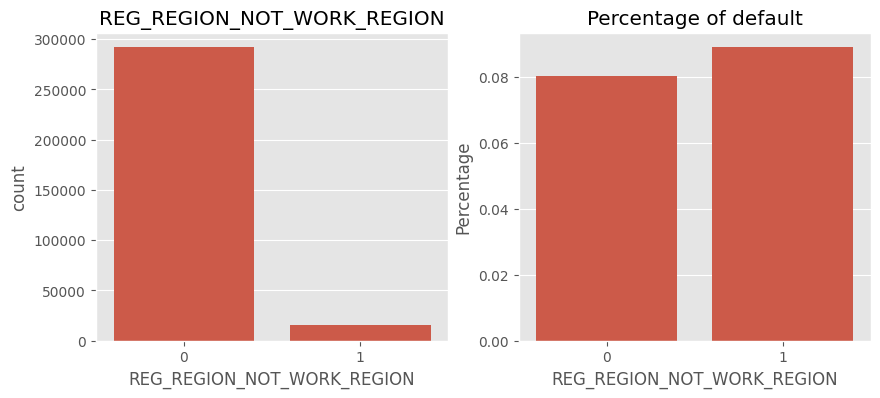

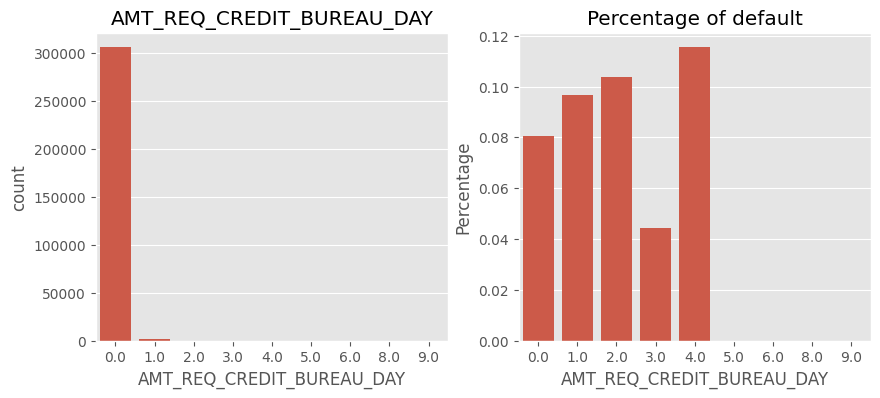

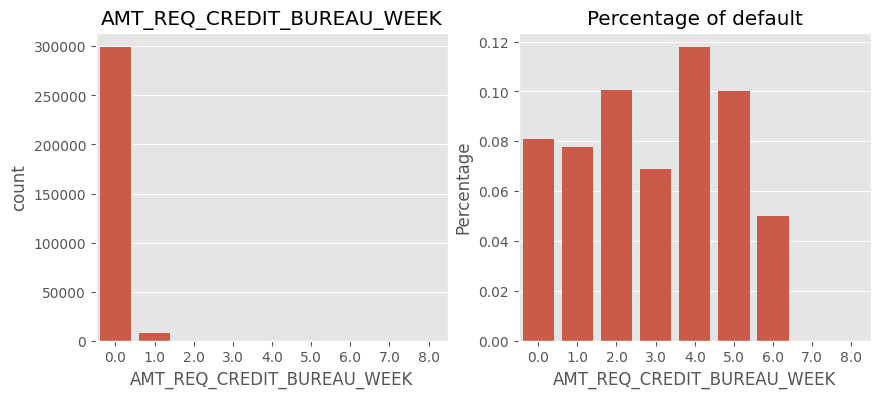

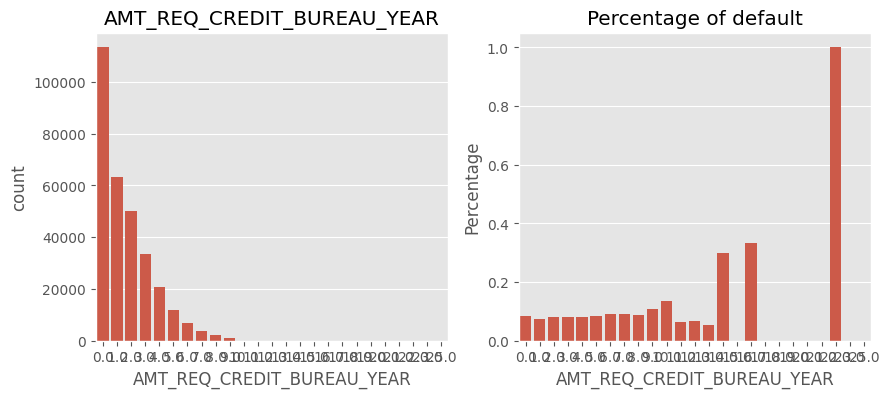

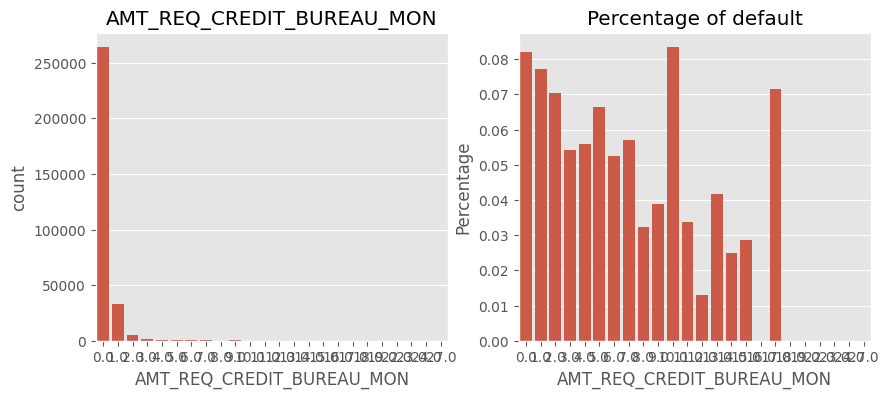

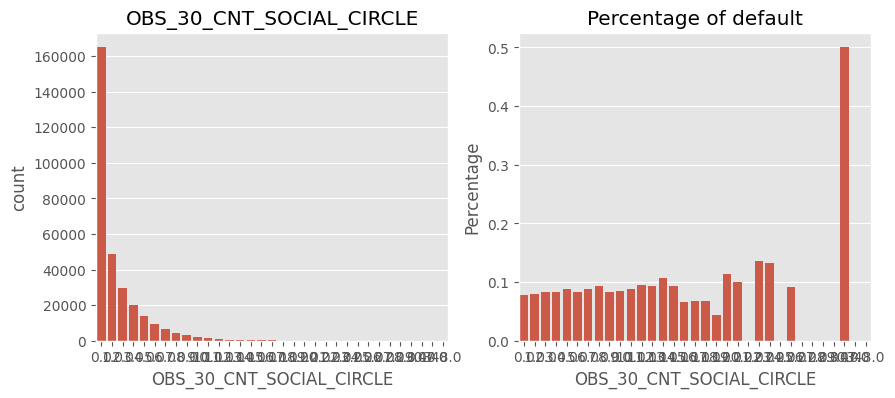

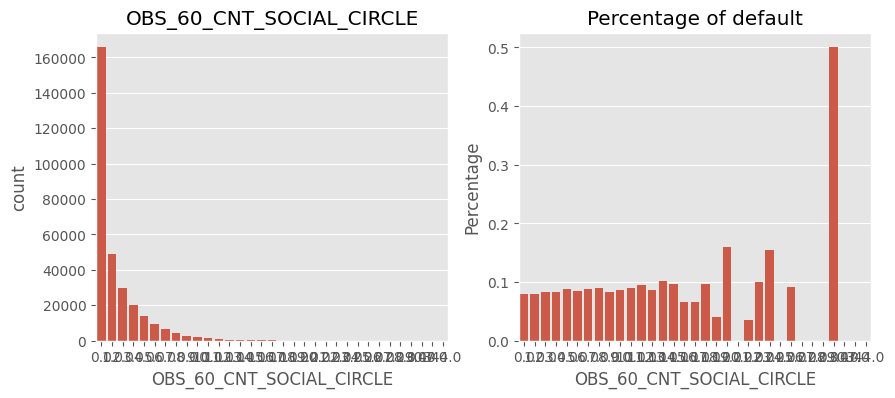

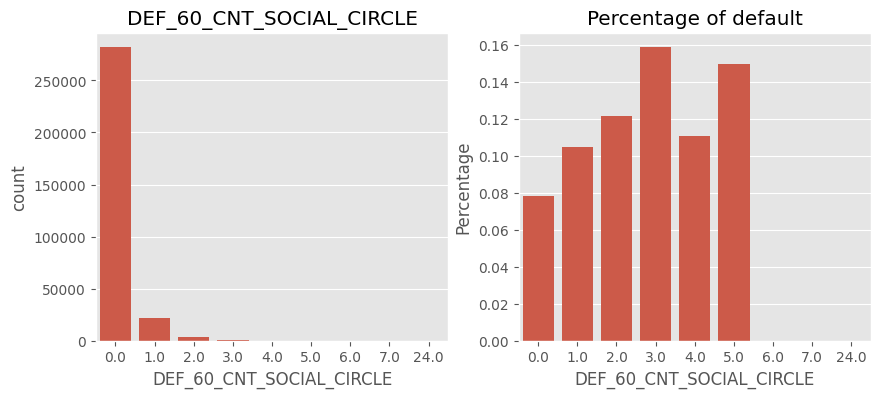

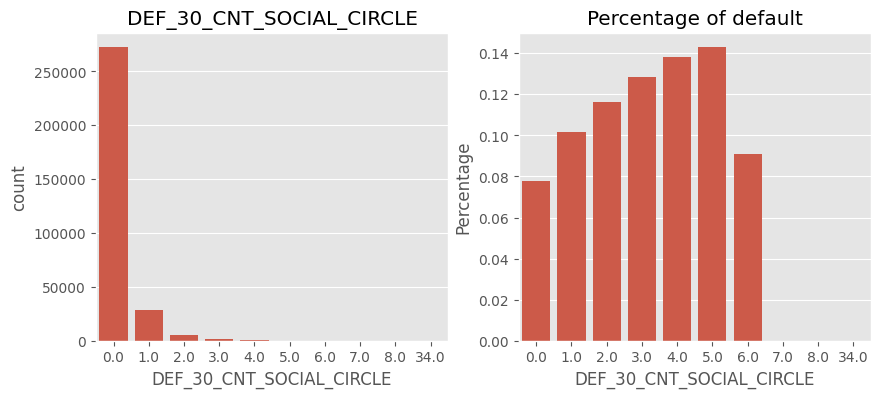

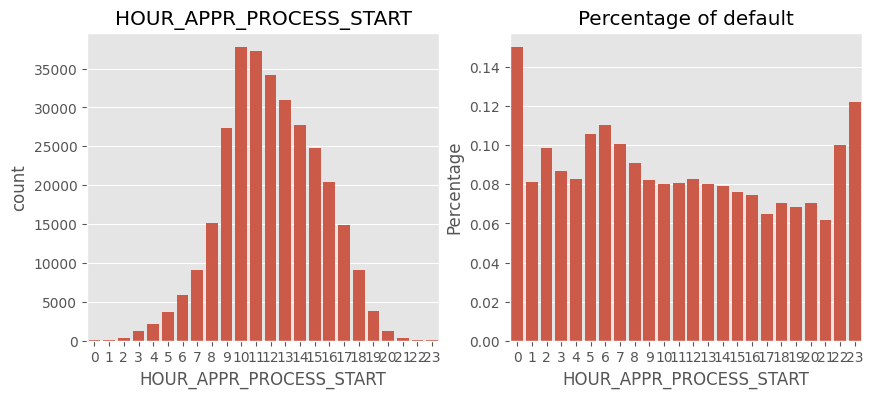

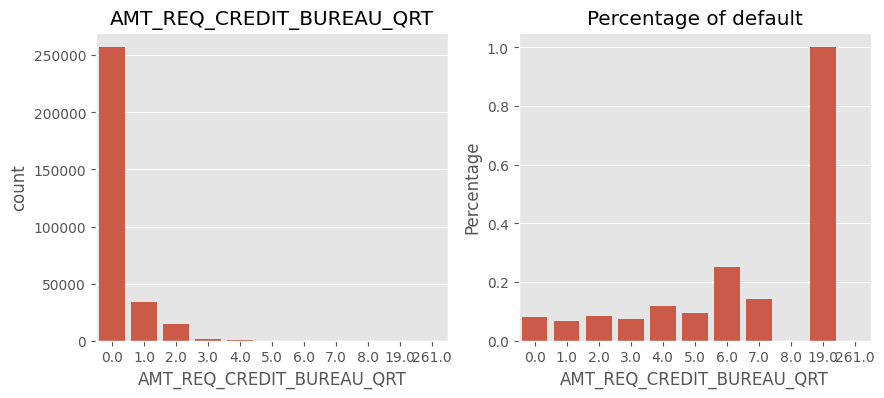

In [82]:
for col in cols:
    plt_percentage(col)

In [83]:
order = ['SATURDAY',"SUNDAY","MONDAY",'TUESDAY','WEDNESDAY','THURSDAY','FRIDAY']

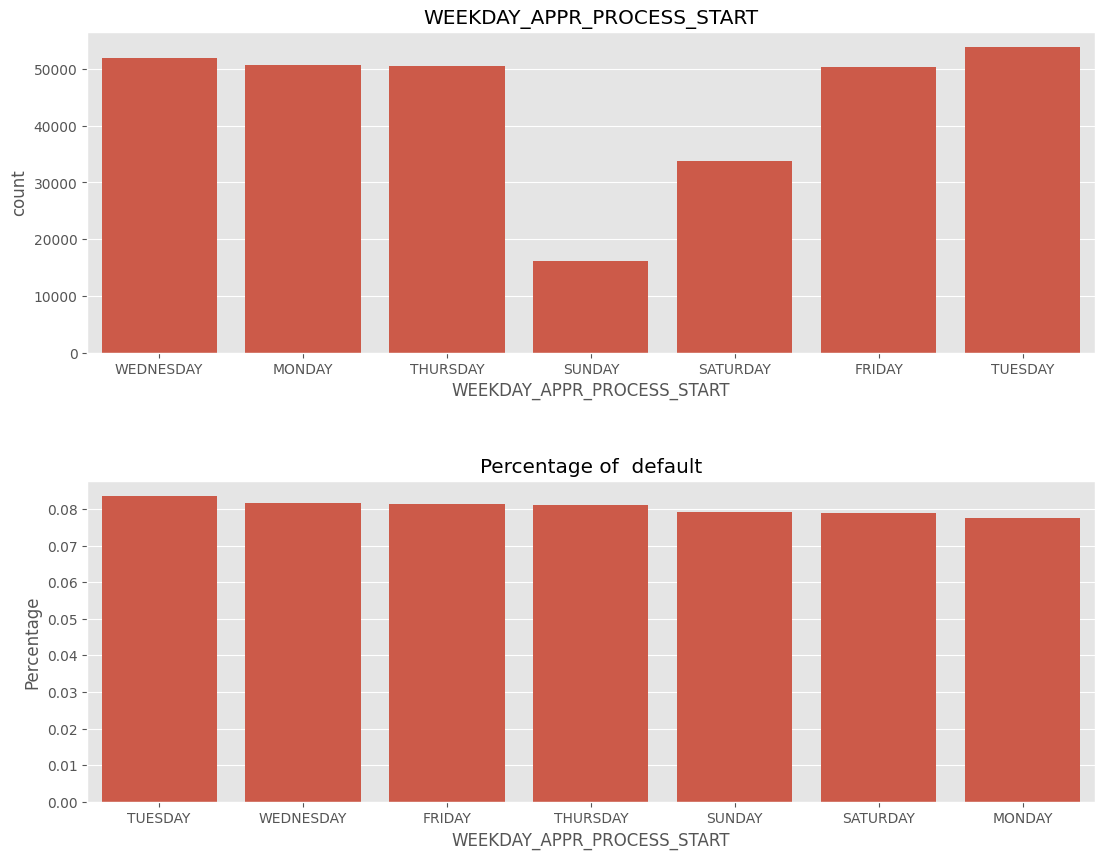

In [84]:
plt_percentage('WEEKDAY_APPR_PROCESS_START' ,h=True)

**After observing all the columns, we found that columns which don’t add any value to our analysis**

### Cheking `CODE_GENDER` , `NAME_CONTRACT_TYPE`

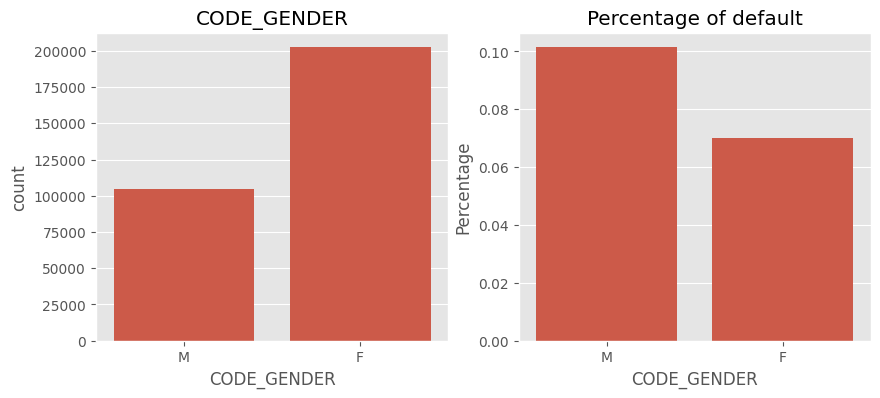

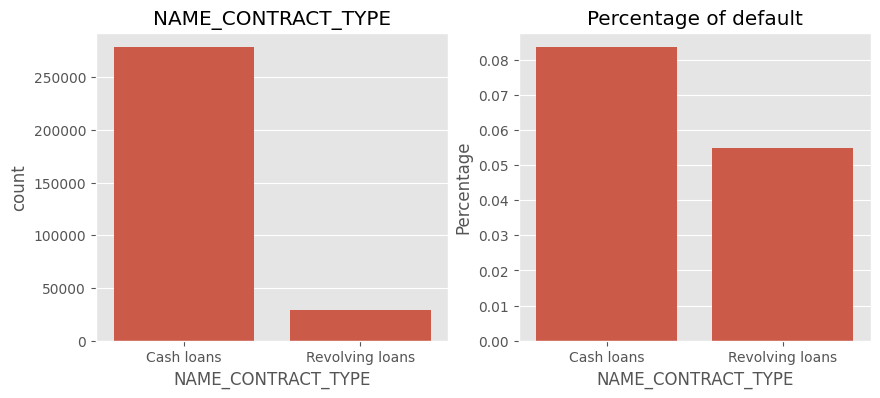

In [85]:
cols = ['CODE_GENDER',"NAME_CONTRACT_TYPE"]
for col in cols:
    plt_percentage(col)

**As we see Female clients higher than male clients for loans but percentage of males who can't repaying the loan more higher than females**

**Most of the clients applied for Cash loans over revolving loans, Clients who take cash loans often  face payments difficulties compared to those who choose revolving loans**

Text(0.5, 1.0, 'Defaulted')

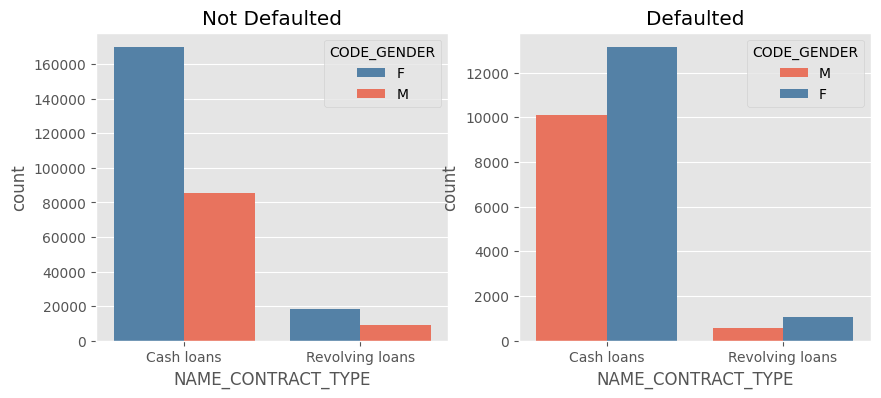

In [86]:
colors = { 'M': 'Tomato', 'F': 'SteelBlue'}
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df_0 , x = "NAME_CONTRACT_TYPE" ,hue="CODE_GENDER",palette=colors)
plt.title("Not Defaulted")
plt.subplot(1,2,2)
sns.countplot(data=df_1 , x = "NAME_CONTRACT_TYPE" ,hue="CODE_GENDER",palette=colors)
plt.title("Defaulted")

 Male candidates with cash loans are the one's with highest default rate as compared to other 3 sub categories, but analyzing alongwith the bar plot, it's clear that both males/females having cash loans have almost equal ratio in defaulting, but looking at the revolving loans, even though the numbers are less, but the females who have taken revolving loans are the highest defaulters

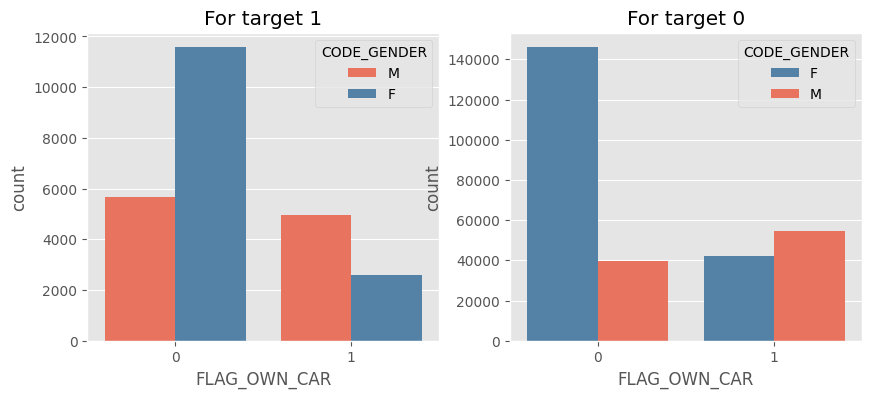

In [87]:
colors = { 'M': 'Tomato', 'F': 'SteelBlue'}
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df_1 , x="FLAG_OWN_CAR" ,hue="CODE_GENDER" ,palette=colors)
plt.title("For target 1")
plt.subplot(1,2,2)
sns.countplot(data=df_0 ,  x="FLAG_OWN_CAR" ,hue="CODE_GENDER" , palette=colors )
plt.title("For target 0")
plt.show()


**Females without car are the most defaulters as compared to males**

### Cheking `AGE`


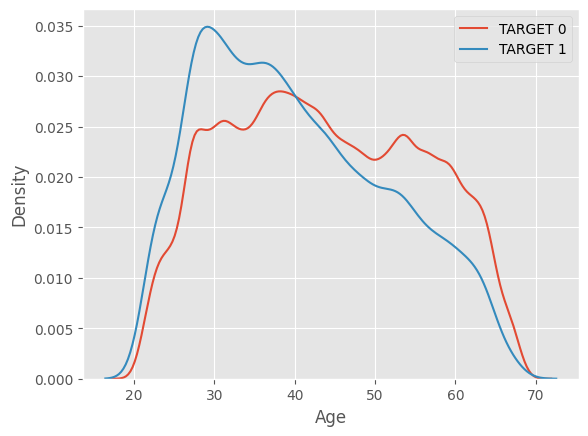

In [88]:
sns.kdeplot(data=df_0,x="YEARS_BIRTH",label="TARGET 0")
sns.kdeplot(data=df_1,x="YEARS_BIRTH",label="TARGET 1")
plt.legend()
plt.xlabel("Age")
plt.show()

In [89]:
df_app_clean["YEARS_BIRTH"].corr(df_app_clean["TARGET"])

-0.07819758613212148

**When people get older tends to repay their loans and from the correlation between age and target is not significant**

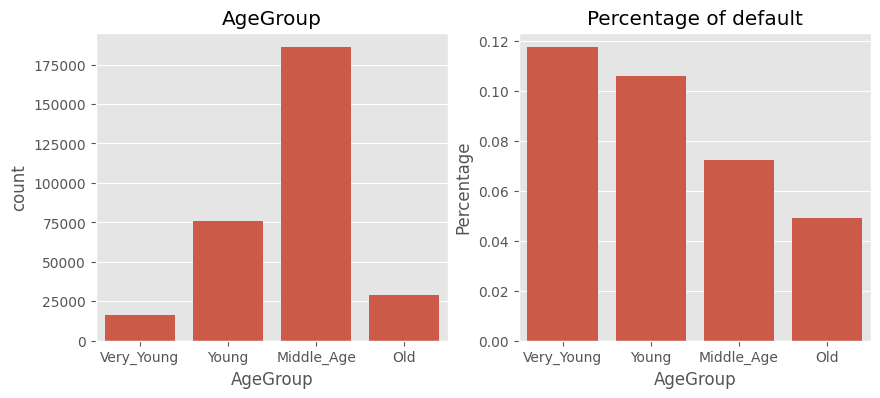

In [90]:
plt_percentage("AgeGroup" )

### Cheking `REG_CITY_NOT_WORK_CITY` ,`REG_CITY_NOT_LIVE_CITY`


In [91]:
c = ["REG_CITY_NOT_WORK_CITY","REG_CITY_NOT_LIVE_CITY" ]

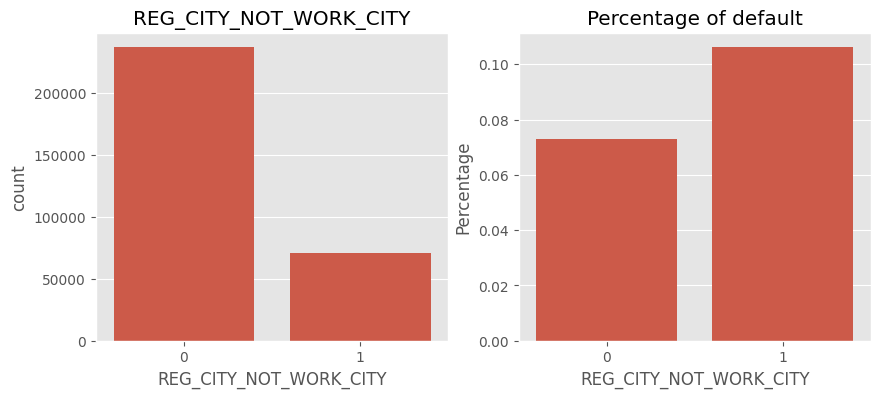

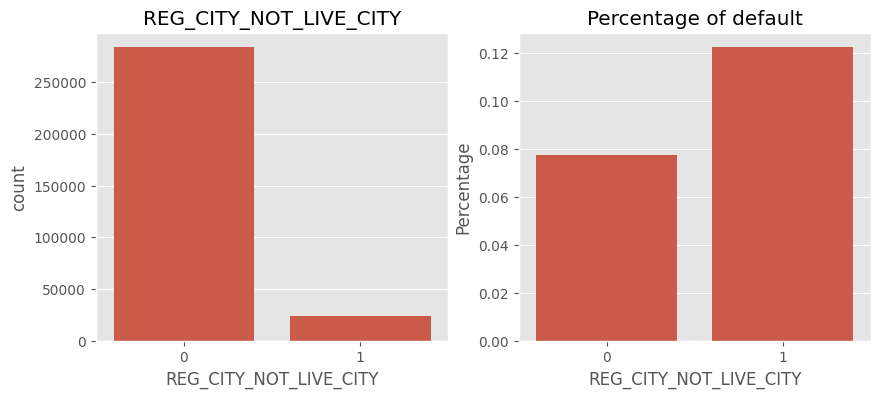

In [92]:
for col in c:
    plt_percentage(col)

**clients who submitted different work and contact addresses are more risky to not repay the loans**

### Cheking `NAME_EDUCATION_TYPE`


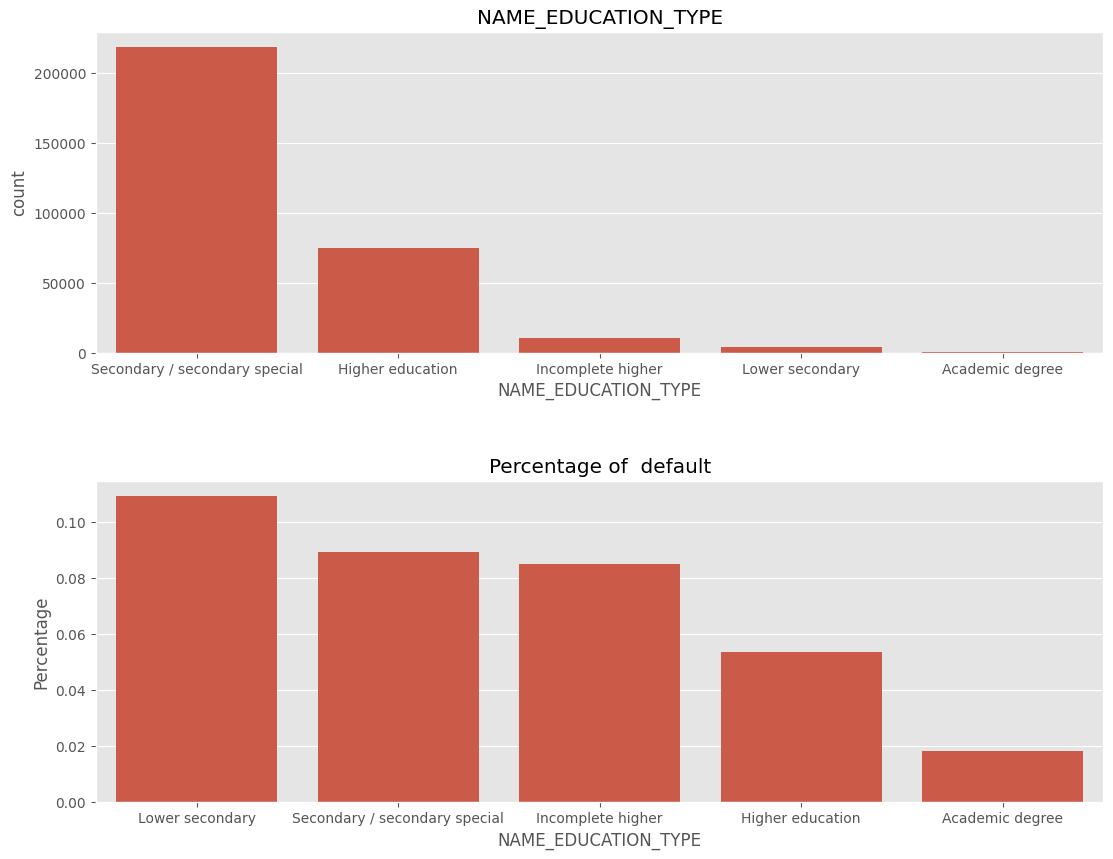

In [93]:
plt_percentage('NAME_EDUCATION_TYPE' ,h=True)

**Name education type : `secondary /special secondary` and `higher education`  are more likely to apply for a loan
but `Lower secondary` and `Secondary/secondary special` more like to default**

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

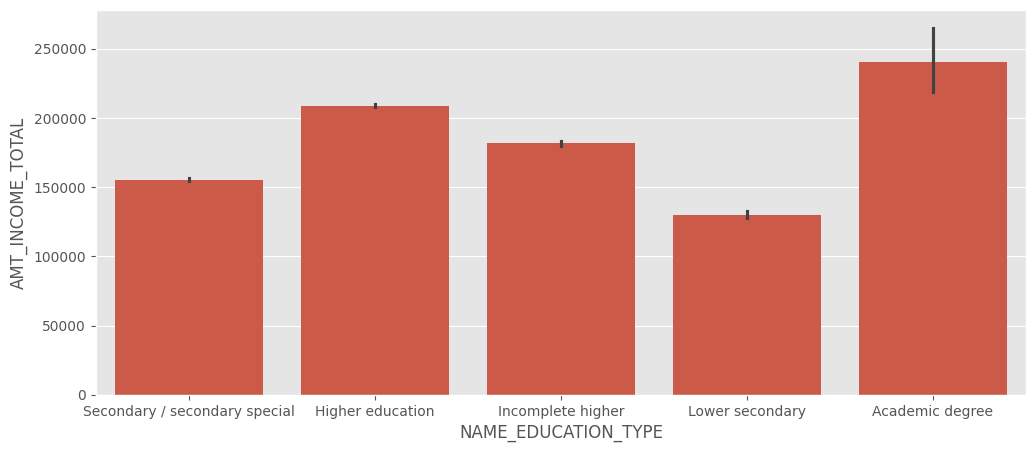

In [94]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_app_clean , x='NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL')

**`Secondary / secondary special` have low income thats lead to increase number of loan for this categories
`Lower secondary` lowest income which illustrate why they don't repay the loan**

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

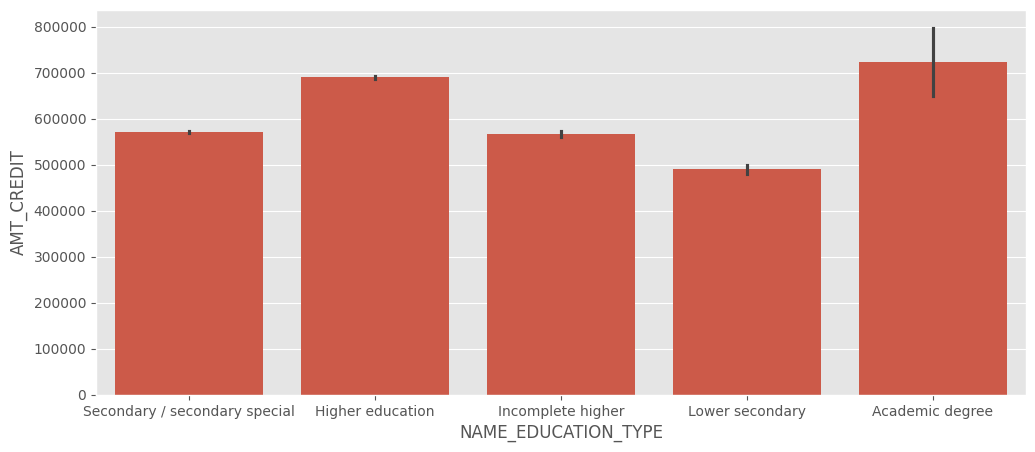

In [95]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_app_clean , x='NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT')

**`Higher education` , `academic degree` have the highest income and highest credit amount**

### Cheking `NAME_HOUSING_TYPE`

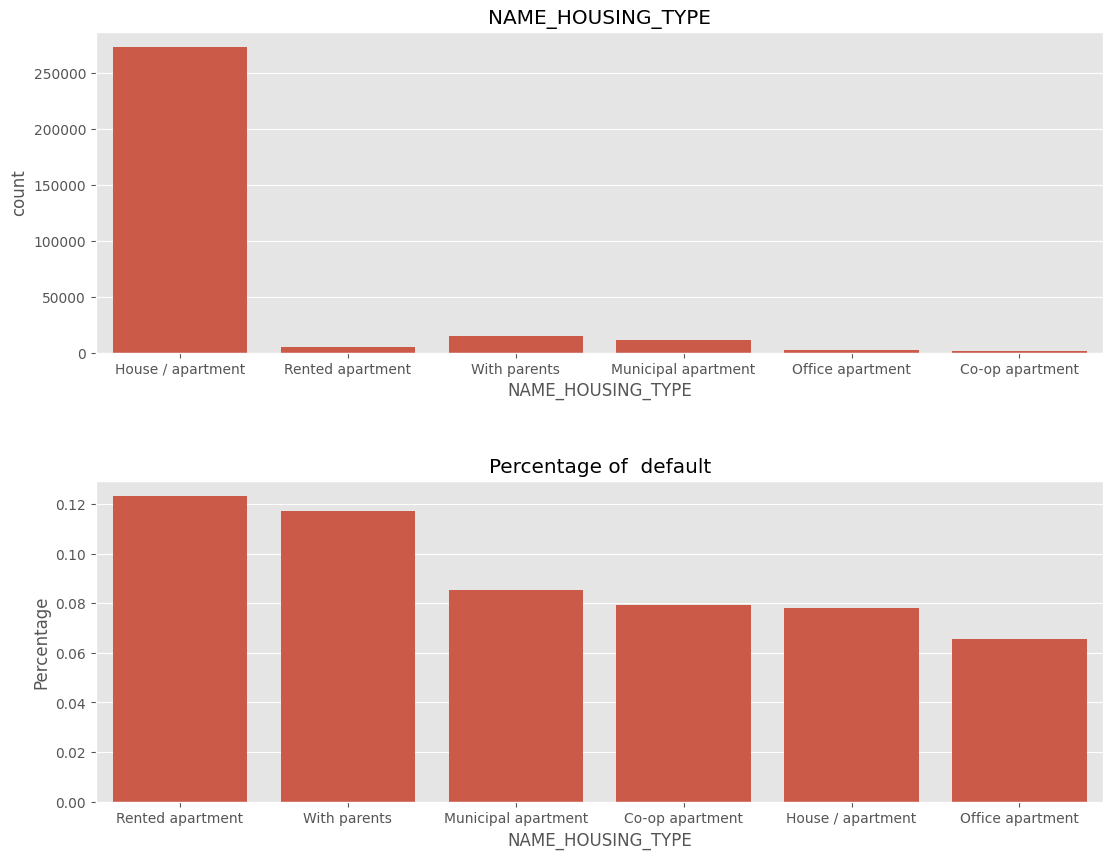

In [96]:
plt_percentage('NAME_HOUSING_TYPE' ,h=True)

- **Most of the clients own a house or living in a apartment and have about 8% of defaulting**

- **clients who live with parents and have rented apartment rare but more risky**

### Cheking `NAME_FAMILY_STATUS`

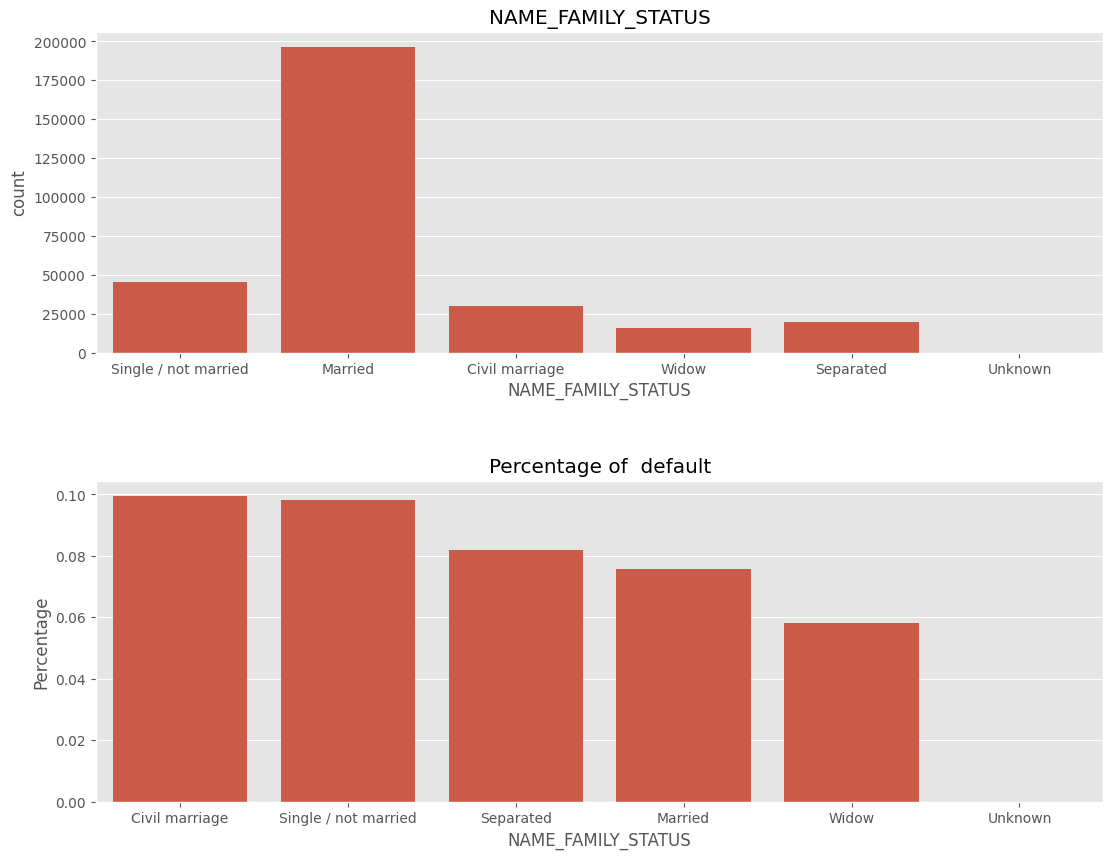

In [97]:
plt_percentage('NAME_FAMILY_STATUS' ,h=True)

- **Most clients are married**

- **civil marraiges and single people have higher chances of defaulting than others.**


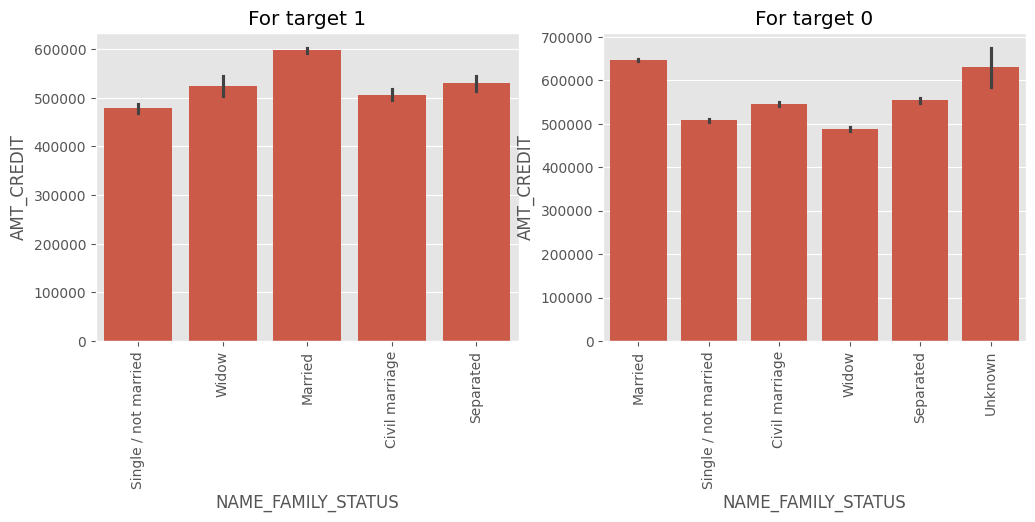

In [98]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=df_1 , x="NAME_FAMILY_STATUS" ,y="AMT_CREDIT" )
plt.title("For target 1")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_0 ,  x="NAME_FAMILY_STATUS" ,y="AMT_CREDIT" )
plt.title("For target 0")
plt.xticks(rotation=90)
plt.show()


**Unknown are the higher income and higher credit amount but all of them repay their loans**

### Cheking `NAME_TYPE_SUITE`

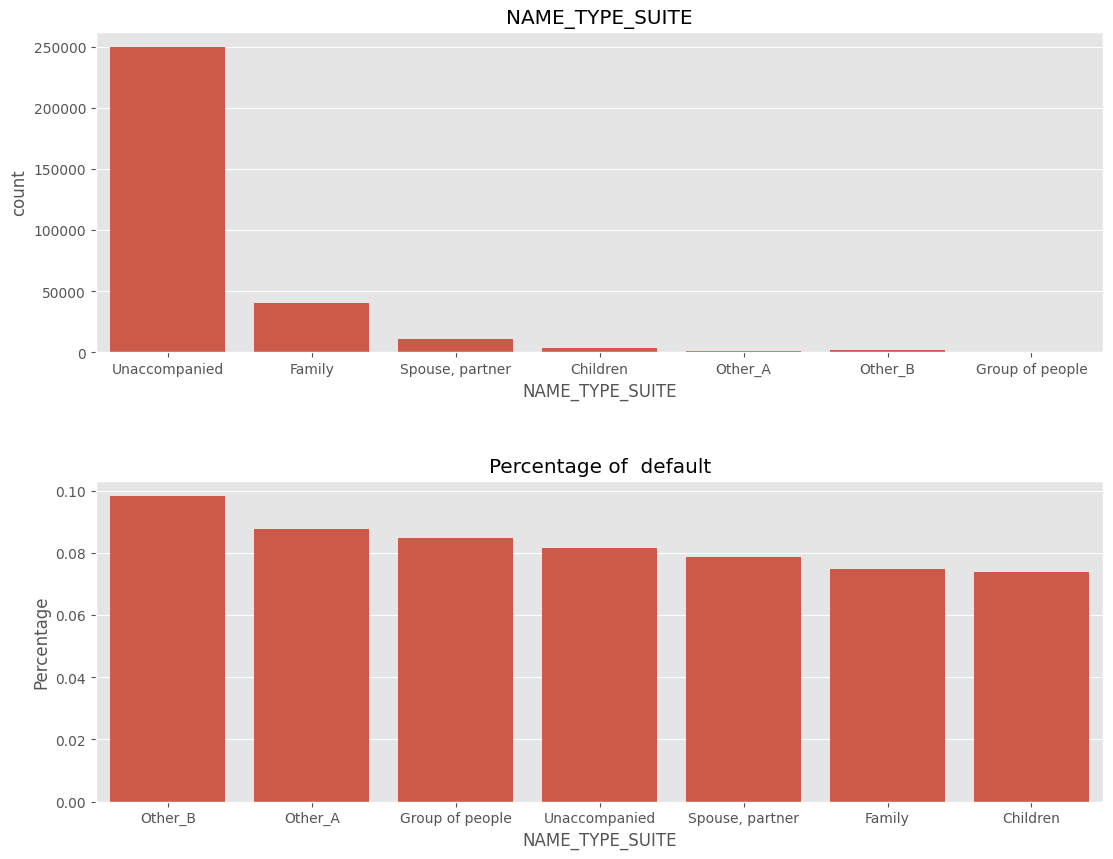

In [99]:
plt_percentage('NAME_TYPE_SUITE' ,h=True)

**when `Other A & B` accompanied clients when he was appling for loans increase percentage of defaulting or not repaying the loan**

### Cheking `NAME_INCOME_TYPE`

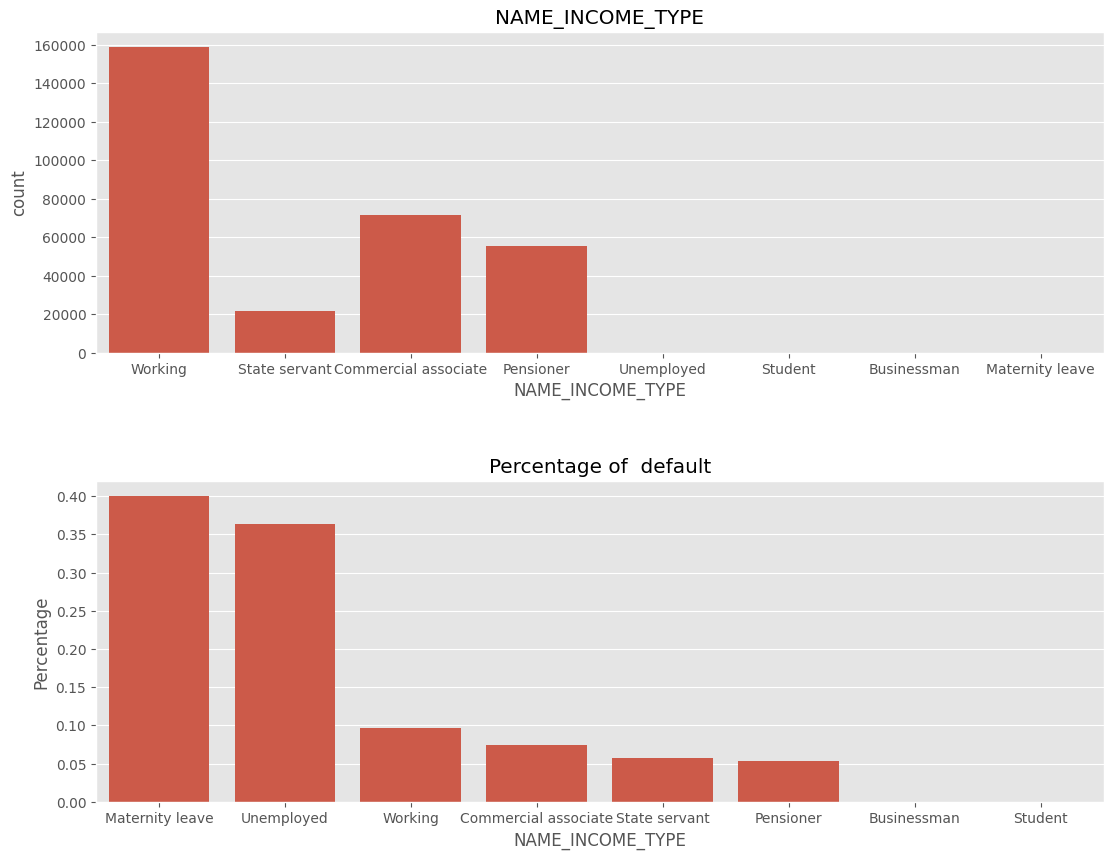

In [100]:
plt_percentage('NAME_INCOME_TYPE' ,h=True)

**Working are the most clients who take loans but most of them have not payment difficulties
Despite few occurance of unemployed and maternity leave they have high percentage of payment difficulties**

**Maternity leave & Unemployed are low income category and take high credit amount**

### Cheking `OCCUPATION_TYPE`

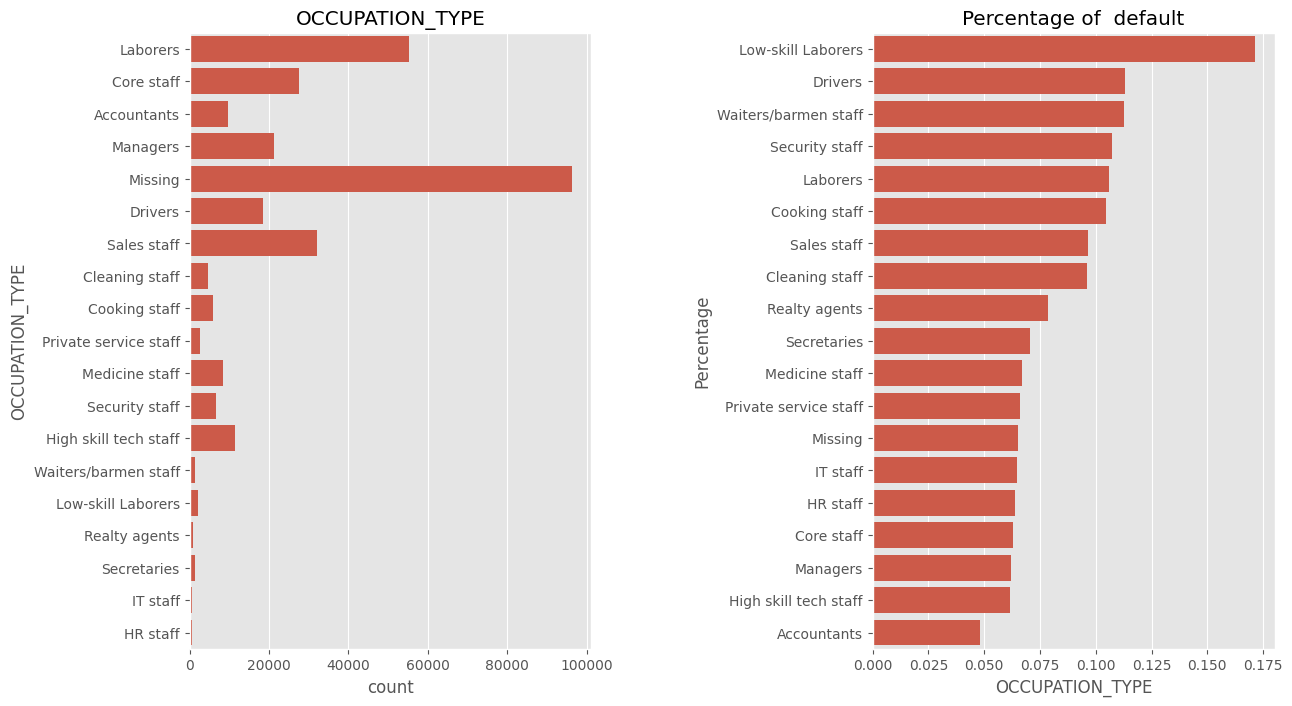

In [101]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.countplot(data=df_app_clean , y='OCCUPATION_TYPE')
plt.title('OCCUPATION_TYPE')
plt.subplot(1,2,2)
percentage_1_in_category = df_app_clean.groupby('OCCUPATION_TYPE')['TARGET'].apply(lambda x: (x == 1).sum() / len(x) ).reset_index()
percentage_1_in_category
sns.barplot(y='OCCUPATION_TYPE', x='TARGET', data=percentage_1_in_category.sort_values(by="TARGET", ascending=False))
plt.title('Percentage of  default')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Percentage')
plt.subplots_adjust(wspace=0.7)

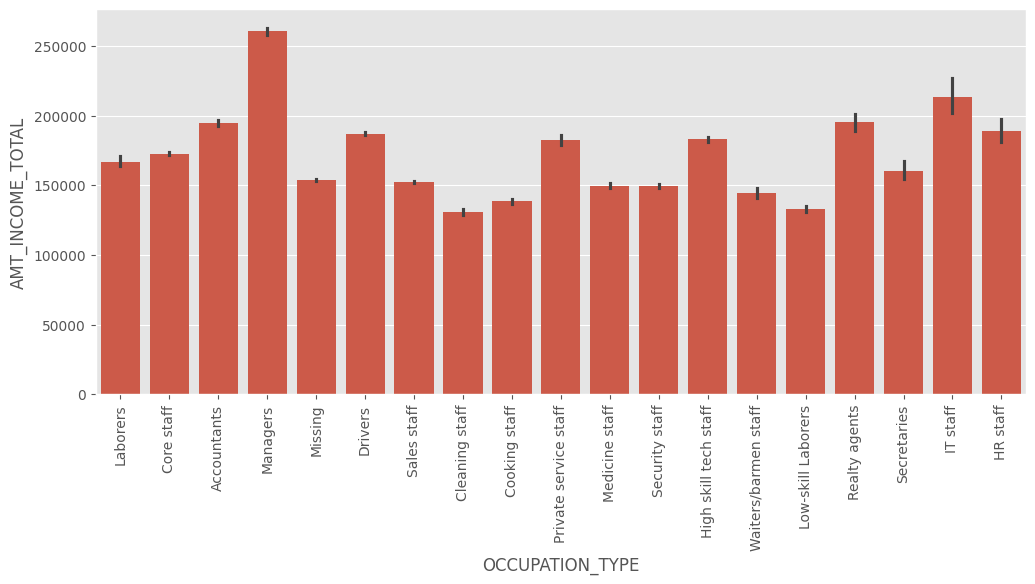

In [102]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_app_clean,x='OCCUPATION_TYPE' ,y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.show()

**`Low_skill laborers`,`Drivers`,`waiters` who have less income range are most likely to be have payment difficulties
than highly paid staffs**

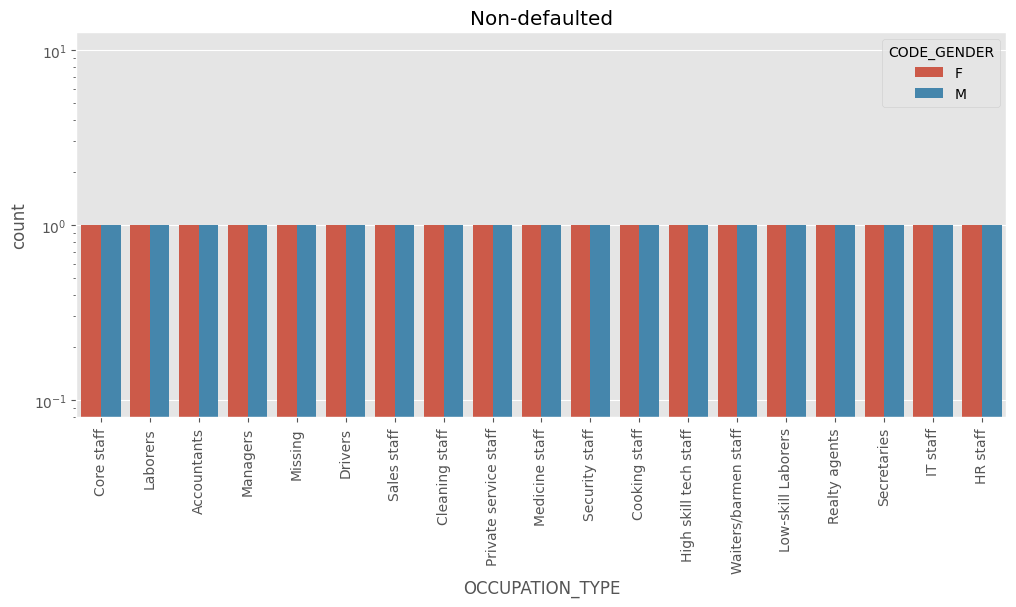

In [103]:
plt.figure(figsize=(12,5))
plt.yscale("log")

sns.countplot(data=df_0,x='OCCUPATION_TYPE',hue="CODE_GENDER")
plt.xticks(rotation=90)
plt.title("Non-defaulted")
plt.show()

- ****`Male`** under occupation:`Laborers`, `Drivers` , `REALTY agents` are the most defaulted sub categories**
- ****`Females`** under occupation : `Accountants`, `Private Service Staff`, `Secretaries`, `Realty Agents`, `HR Staff` etc are the most defaulted**

### Cheking `CNT_CHILDREN` , `CNT_FAM_MEMBERS`

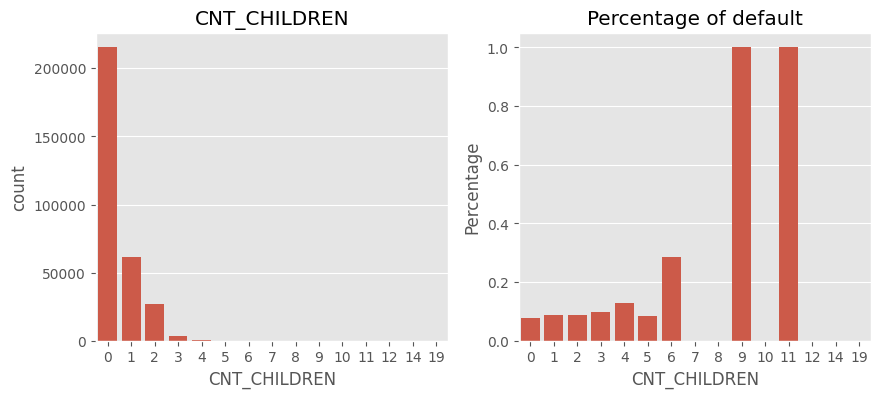

In [104]:
plt_percentage("CNT_CHILDREN")

**Most clients have no or very few children and are likely to repay loan on time.
Clients with very high number of children are risky**

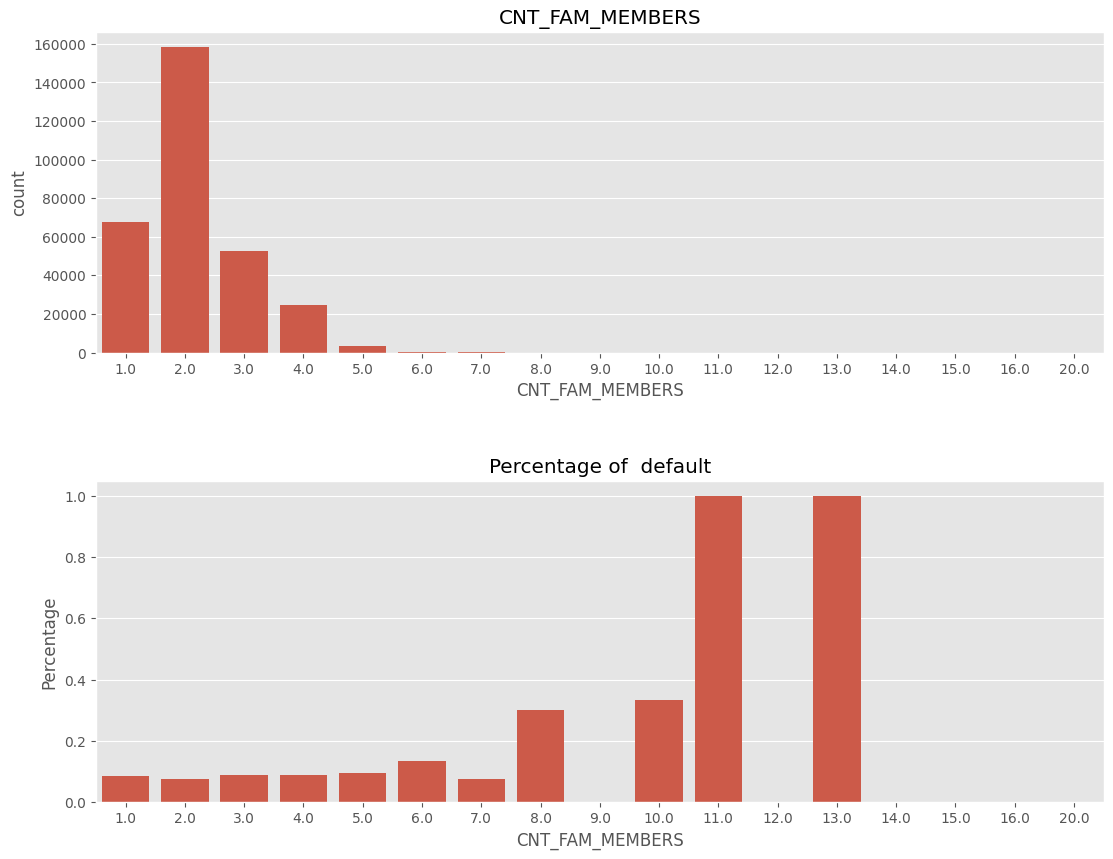

In [105]:
plt_percentage("CNT_FAM_MEMBERS",h=True)

**Client with high number of family memebers have more percentage to default**

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

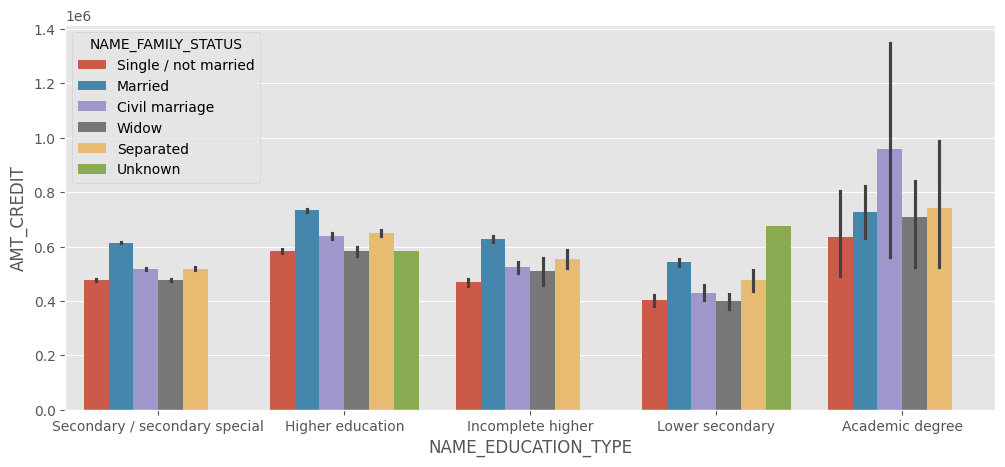

In [106]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_app_clean,x="NAME_EDUCATION_TYPE" , y = 'AMT_CREDIT' , hue="NAME_FAMILY_STATUS")

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

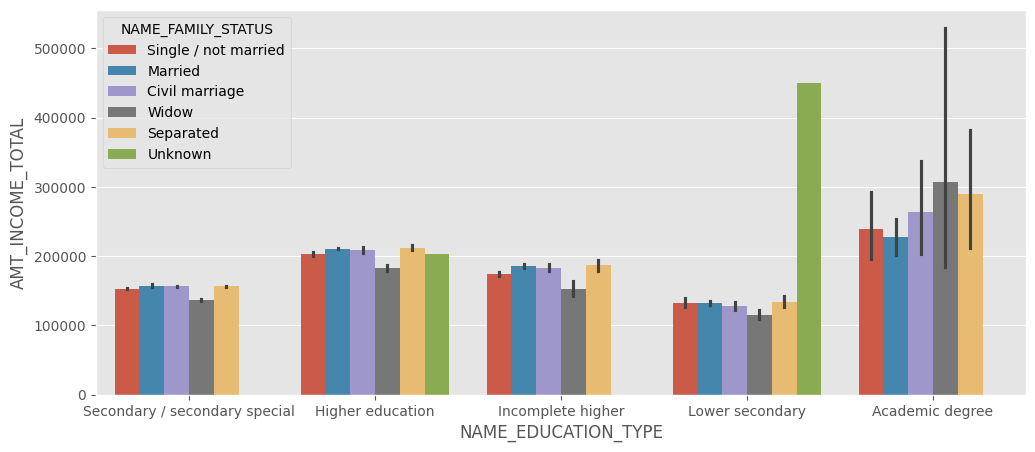

In [107]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_app_clean,x="NAME_EDUCATION_TYPE" , y = 'AMT_INCOME_TOTAL' , hue="NAME_FAMILY_STATUS")

- **We can see that applicants gets most loan amount credit who have a family status as Civil marriage and has a Academic degree**
- **We also notice that Single/ not married has the lowest Amt_Credit irrespective of Education type**

In [108]:
y = ['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']

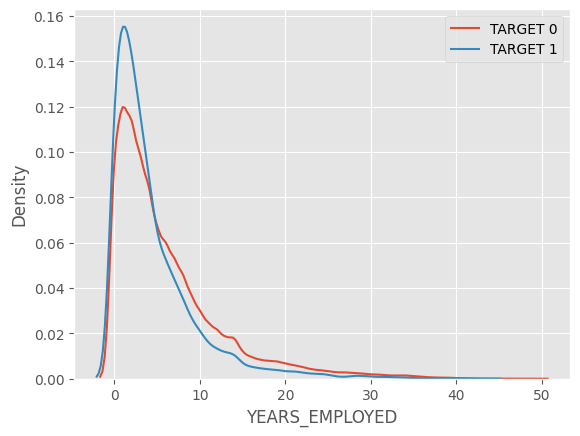

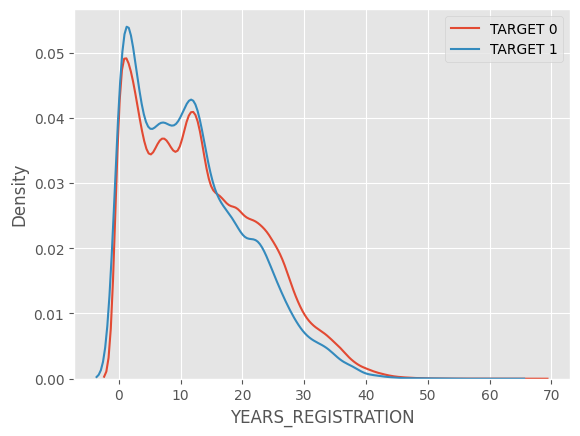

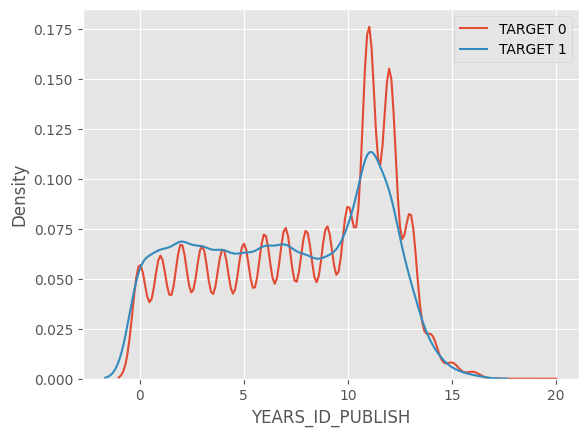

In [109]:
for i in y :
    sns.kdeplot(data=df_0,x=i,label="TARGET 0")
    sns.kdeplot(data=df_1,x=i,label="TARGET 1")
    plt.legend()
    plt.xlabel(i)
    plt.show()

**Clients who started hiring soon are the most clients who take loans**

In [110]:
df_app_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AgeGroup,Documents_sub,phones_sub
0,100002,1,Cash loans,M,0,1,0,202500,406598,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,25,1,9,5,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,0,2,2,2,2,3,0,0,0,0,0,1,Very_Young,1,4
1,100003,0,Cash loans,F,0,0,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0,45,3,3,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,NaN,1,0,1,0,2,0,0,0,0,0,0,Middle_Age,1,4
2,100004,0,Revolving loans,M,1,1,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,52,0,11,6,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,1,1,0,0,0,0,2,0,0,0,0,0,0,Middle_Age,0,5
3,100006,0,Cash loans,F,0,1,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,52,8,26,6,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1,NaN,2,0,2,0,1,0,0,0,0,0,0,Middle_Age,1,3
4,100007,0,Cash loans,M,0,1,0,121500,513000,21866,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,54,8,11,9,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,NaN,0,0,0,0,3,0,0,0,0,0,0,Middle_Age,1,3


In [111]:
df_app_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## XGBoost Classification

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

# One-Hot Encode categorical variables
X = pd.get_dummies(df_app_clean.drop(columns=['SK_ID_CURR', 'TARGET']), drop_first=True)
y = df_app_clean['TARGET']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost with scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Ratio of majority/minority class
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83     56538
           1       0.17      0.62      0.27      4965

    accuracy                           0.73     61503
   macro avg       0.56      0.68      0.55     61503
weighted avg       0.89      0.73      0.79     61503

Confusion Matrix:
 [[41655 14883]
 [ 1874  3091]]
AUC-ROC Score: 0.7434737438485259


## Random Forest Classification

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define features (X) and target (y)
X = pd.get_dummies(df_app_clean.drop(columns=['SK_ID_CURR', 'TARGET']), drop_first=True)  # One-Hot Encode categorical features
y = df_app_clean['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.64      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.78      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

Confusion Matrix:
 [[56534     4]
 [ 4958     7]]
AUC-ROC Score: 0.7226536443134772
